# Exploratory Analysis - IOM Displacement Tracking Matrix

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from shapely.geometry import Point
import networkx as nx
import random
random.seed(10)
#import geopy
%matplotlib inline

In [3]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
df = gpd.GeoDataFrame()
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()
pairs = [(Point(i.Longitude, i.Latitude), 'd') for i in d91.itertuples() ] \
            + [(Point(i.Longitude, i.Latitude), 'r') for i in r91.itertuples() ]
point = []
colour = []
for i, j in pairs:
    point.append(i), colour.append(j)
    
df['points'] = point
df['colour'] = colour
df = df.set_geometry('points')

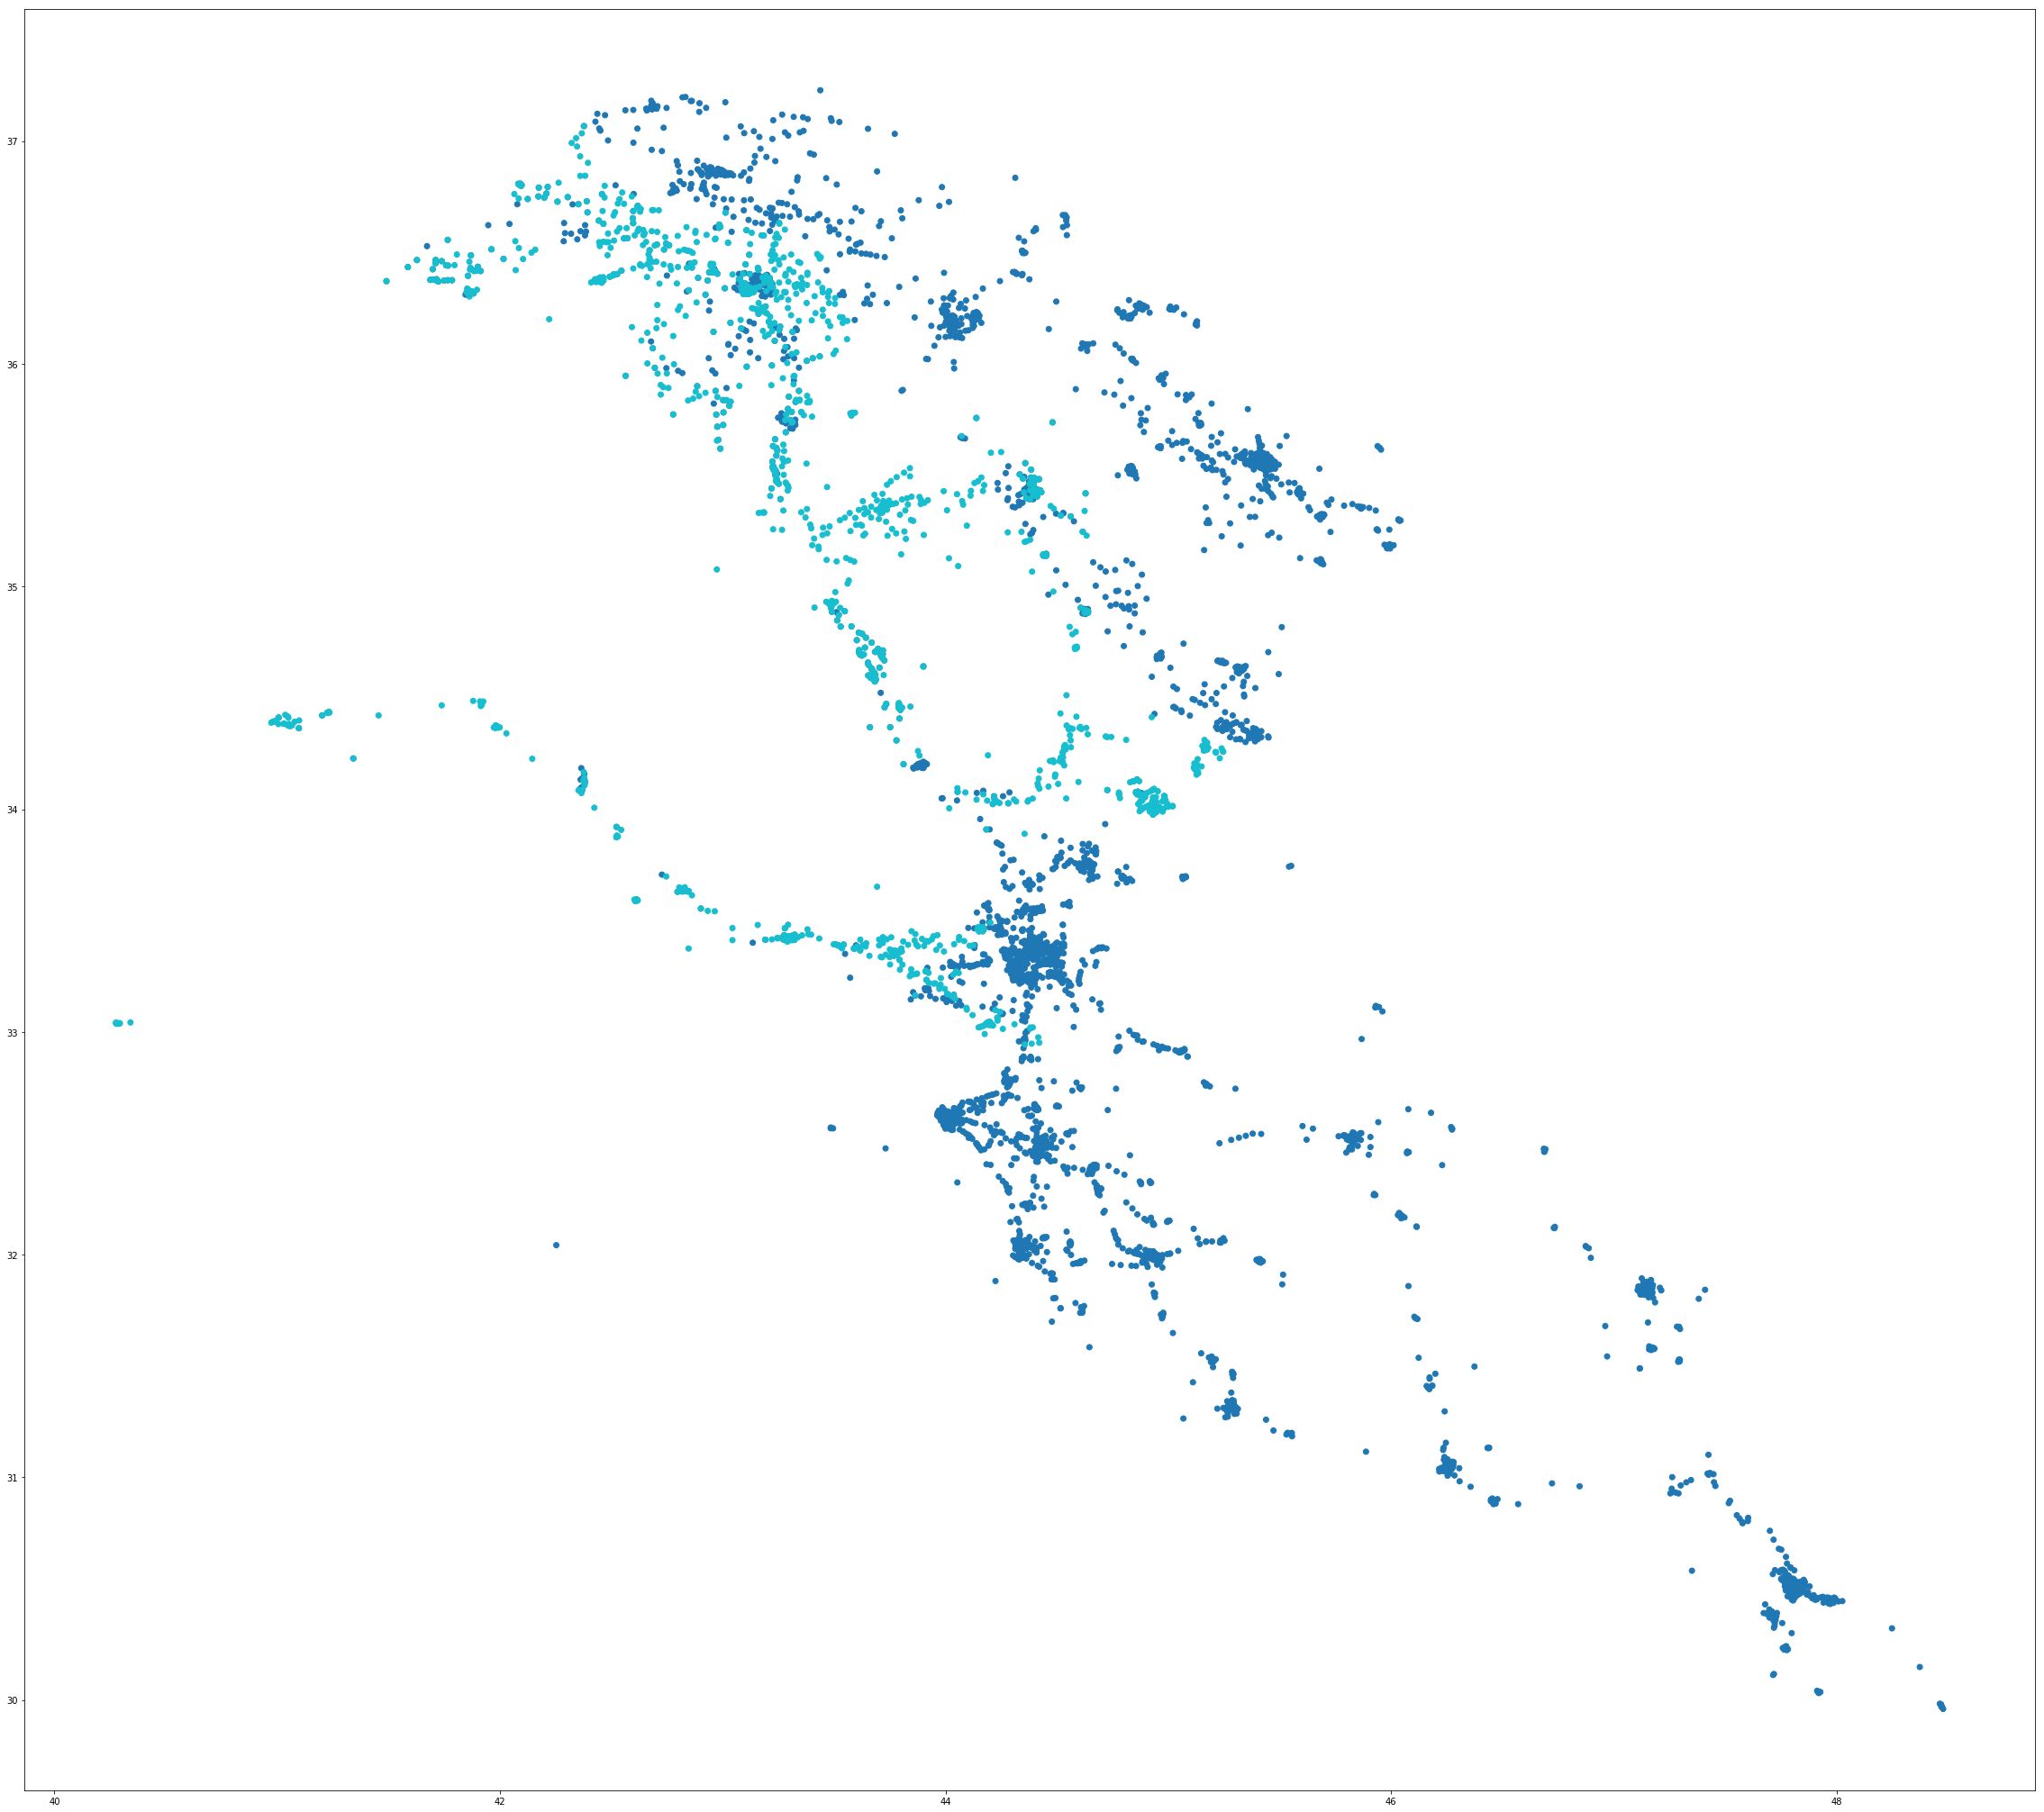

In [4]:
plt.rcParams["figure.figsize"] = (40,40)
df.plot(column='colour')

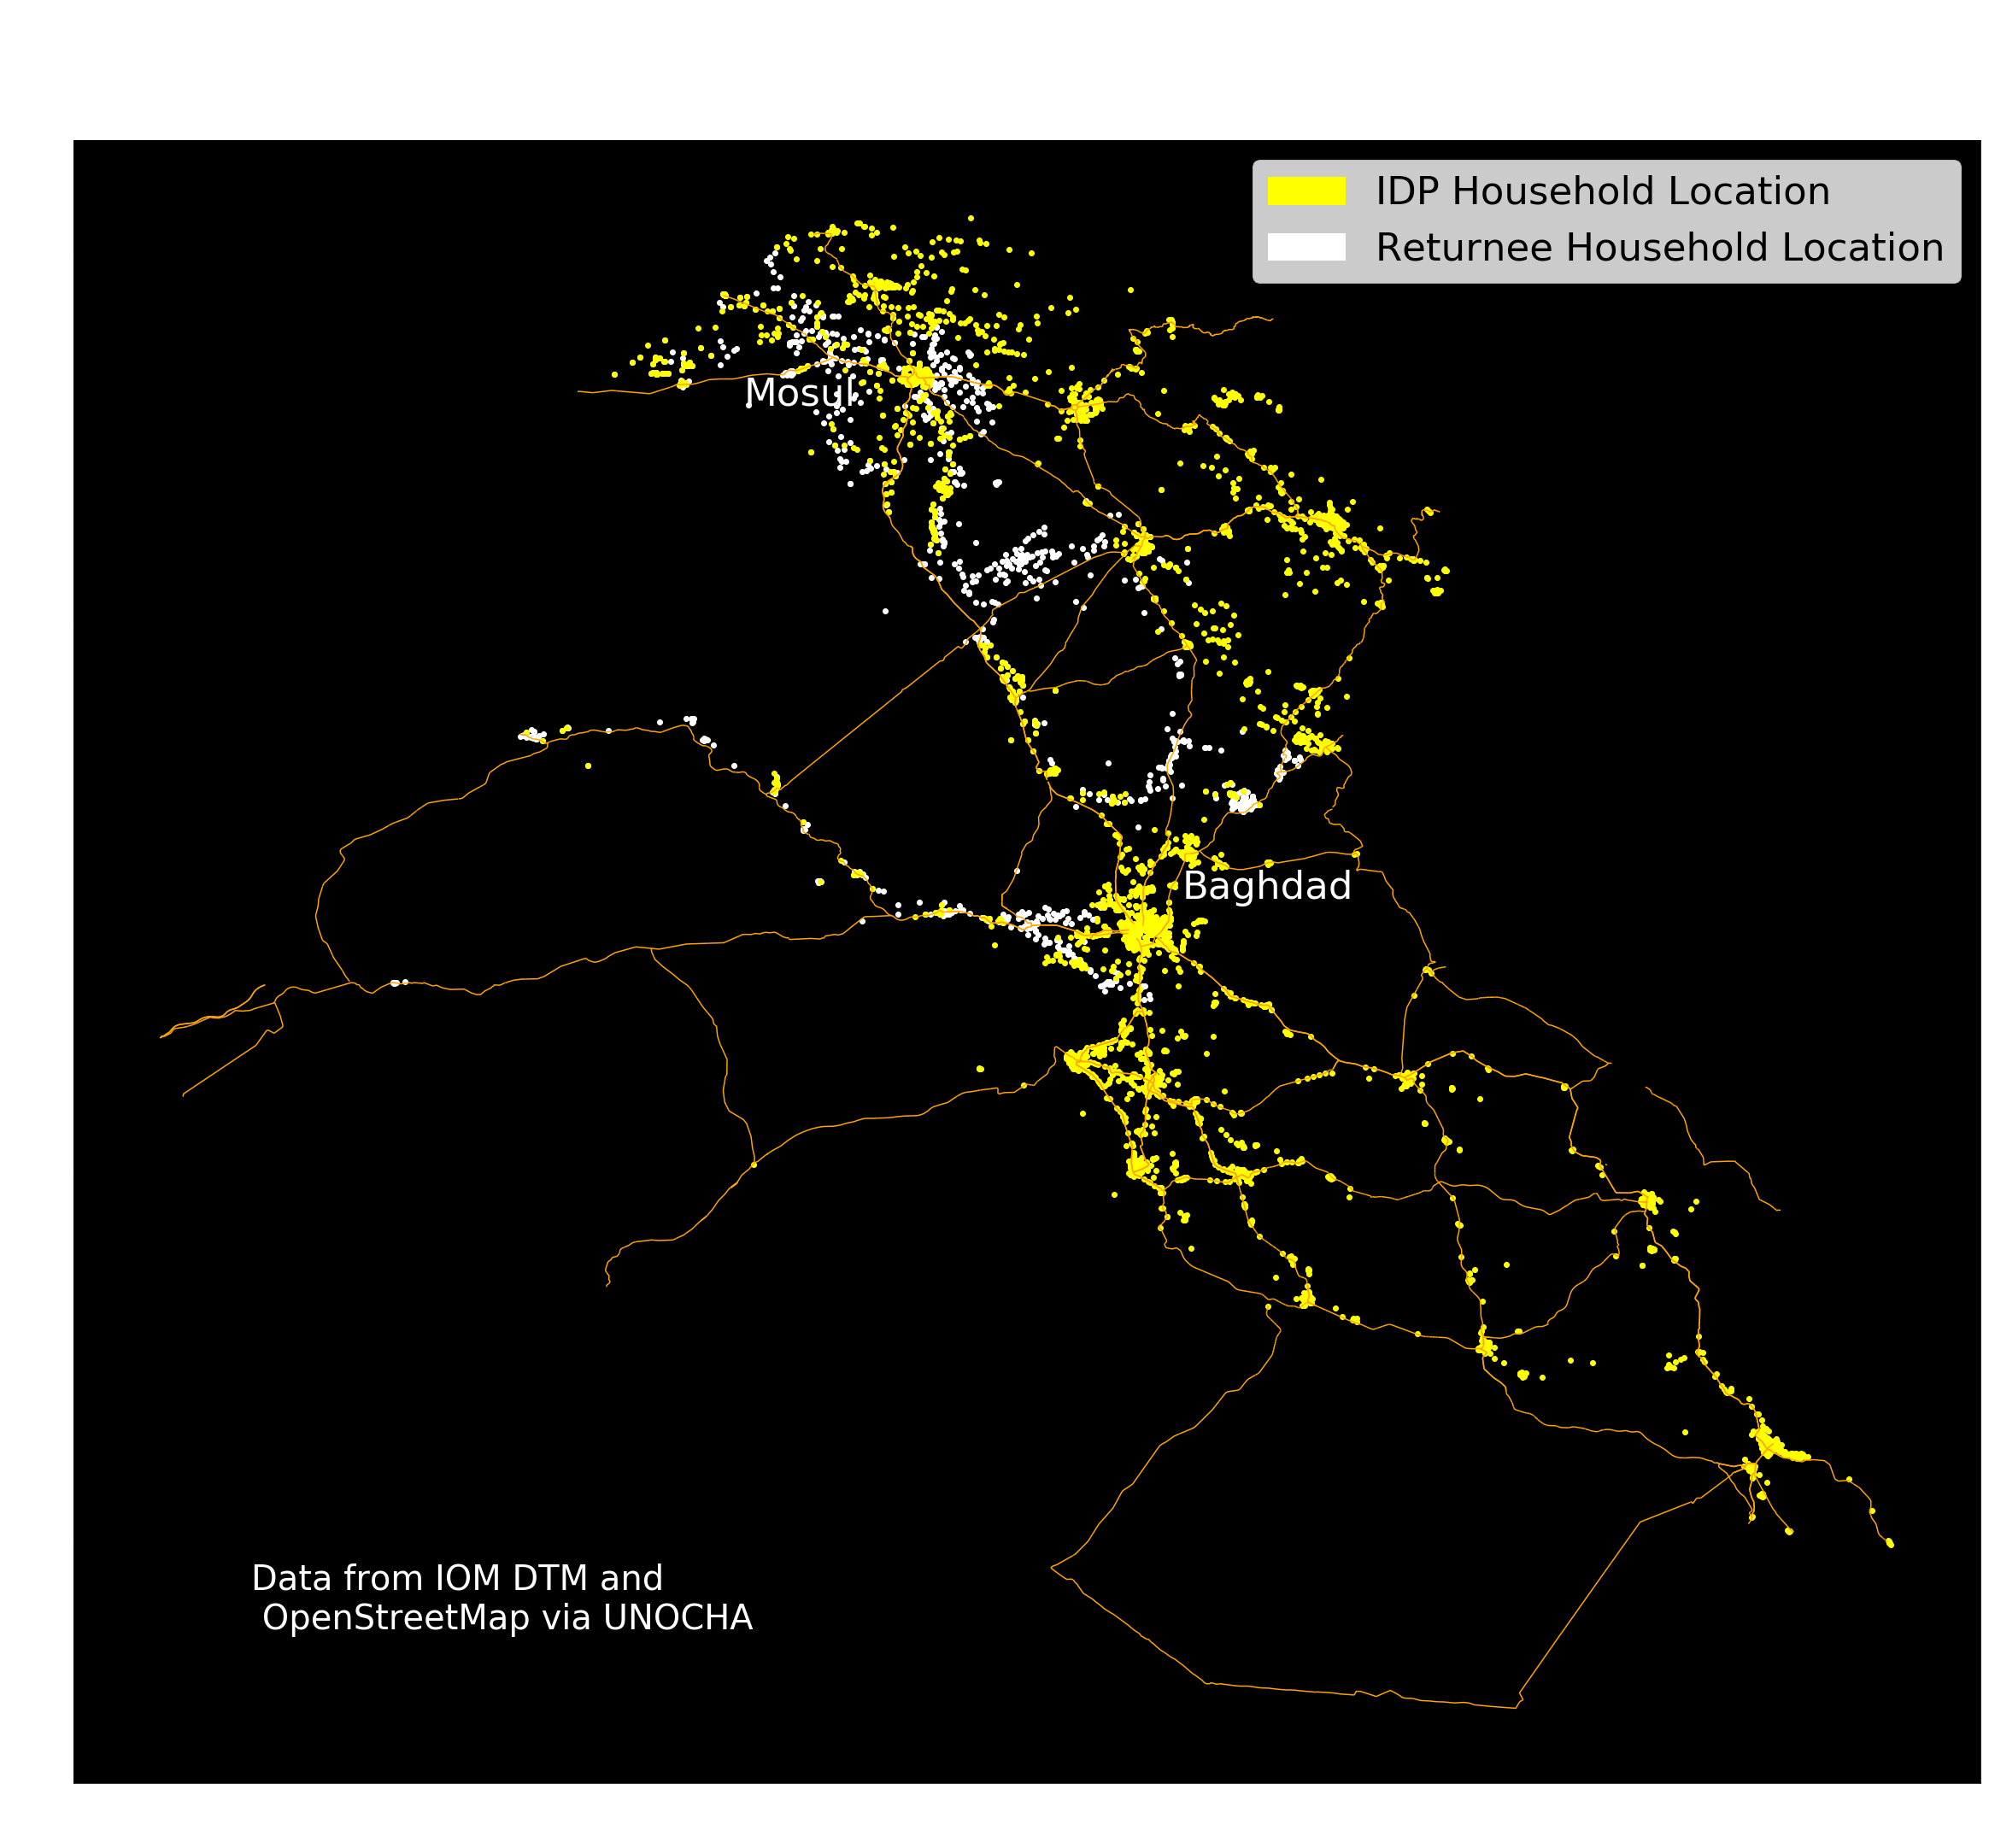

In [109]:
import matplotlib.patches as mpatches
iraq = gpd.read_file('map.geojson')

rounds = range(1,91+1)


d = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()


dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d.itertuples() ] 
dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r.itertuples() ]
dfd['counts'] = d['Families']
dfr['counts'] = r['Families']
dfr = dfr.set_geometry('points')
dfr.crs = iraq.crs
dfd = dfd.set_geometry('points')
dfd.crs = iraq.crs

plt.rcParams["figure.figsize"] = (40,40)
#iq = iraq.plot(color='black', edgecolor='white')
iq = routes.plot(color = 'orange')
dfr.plot(ax=iq, color='white', label = "Return")
dfd.plot(ax=iq, color='yellow', label = "Diplacement")
red_patch = mpatches.Patch(color='yellow', label='IDP Household Location')
blue_patch = mpatches.Patch(color='white', label='Returnee Household Location')
plt.legend(handles=[red_patch, blue_patch], prop={'size': 45})
plt.title("Iraq Displacement & Return, March 2018\n", fontsize = 80, color = "white")
plt.xlabel("Latitude", color = "white", fontsize = 30)
plt.ylabel("Longitude", color = "white", fontsize = 30)
plt.tick_params(labelsize = 30 , colors = "white")
ax = plt.gca()

ax.set_facecolor('black')
plt.text(42.2, 36.2, s= "Mosul",  color = 'white', fontsize = 45)
plt.text(44.6, 33.5, s= "Baghdad",  color = 'white', fontsize = 45)
plt.text(39.5, 29.5, s = "Data from IOM DTM and \n OpenStreetMap via UNOCHA", color = 'white', fontsize = 40)
plt.show();

In [112]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.

In [6]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")

def plot_map(d91, r91, name):
    dfr = gpd.GeoDataFrame()
    dfd = gpd.GeoDataFrame()

    iraq = gpd.read_file('map.geojson')
    dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d91.itertuples() ] 
    dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r91.itertuples() ]
    dfr = dfr.set_geometry('points')
    dfd = dfd.set_geometry('points')
    iraq.to_crs = {'init' :'epsg:4467'}

    base = dfr.plot(color='red')
    dfd.plot(ax=base, marker='o', color='blue');
    plt.savefig(name + ".png")

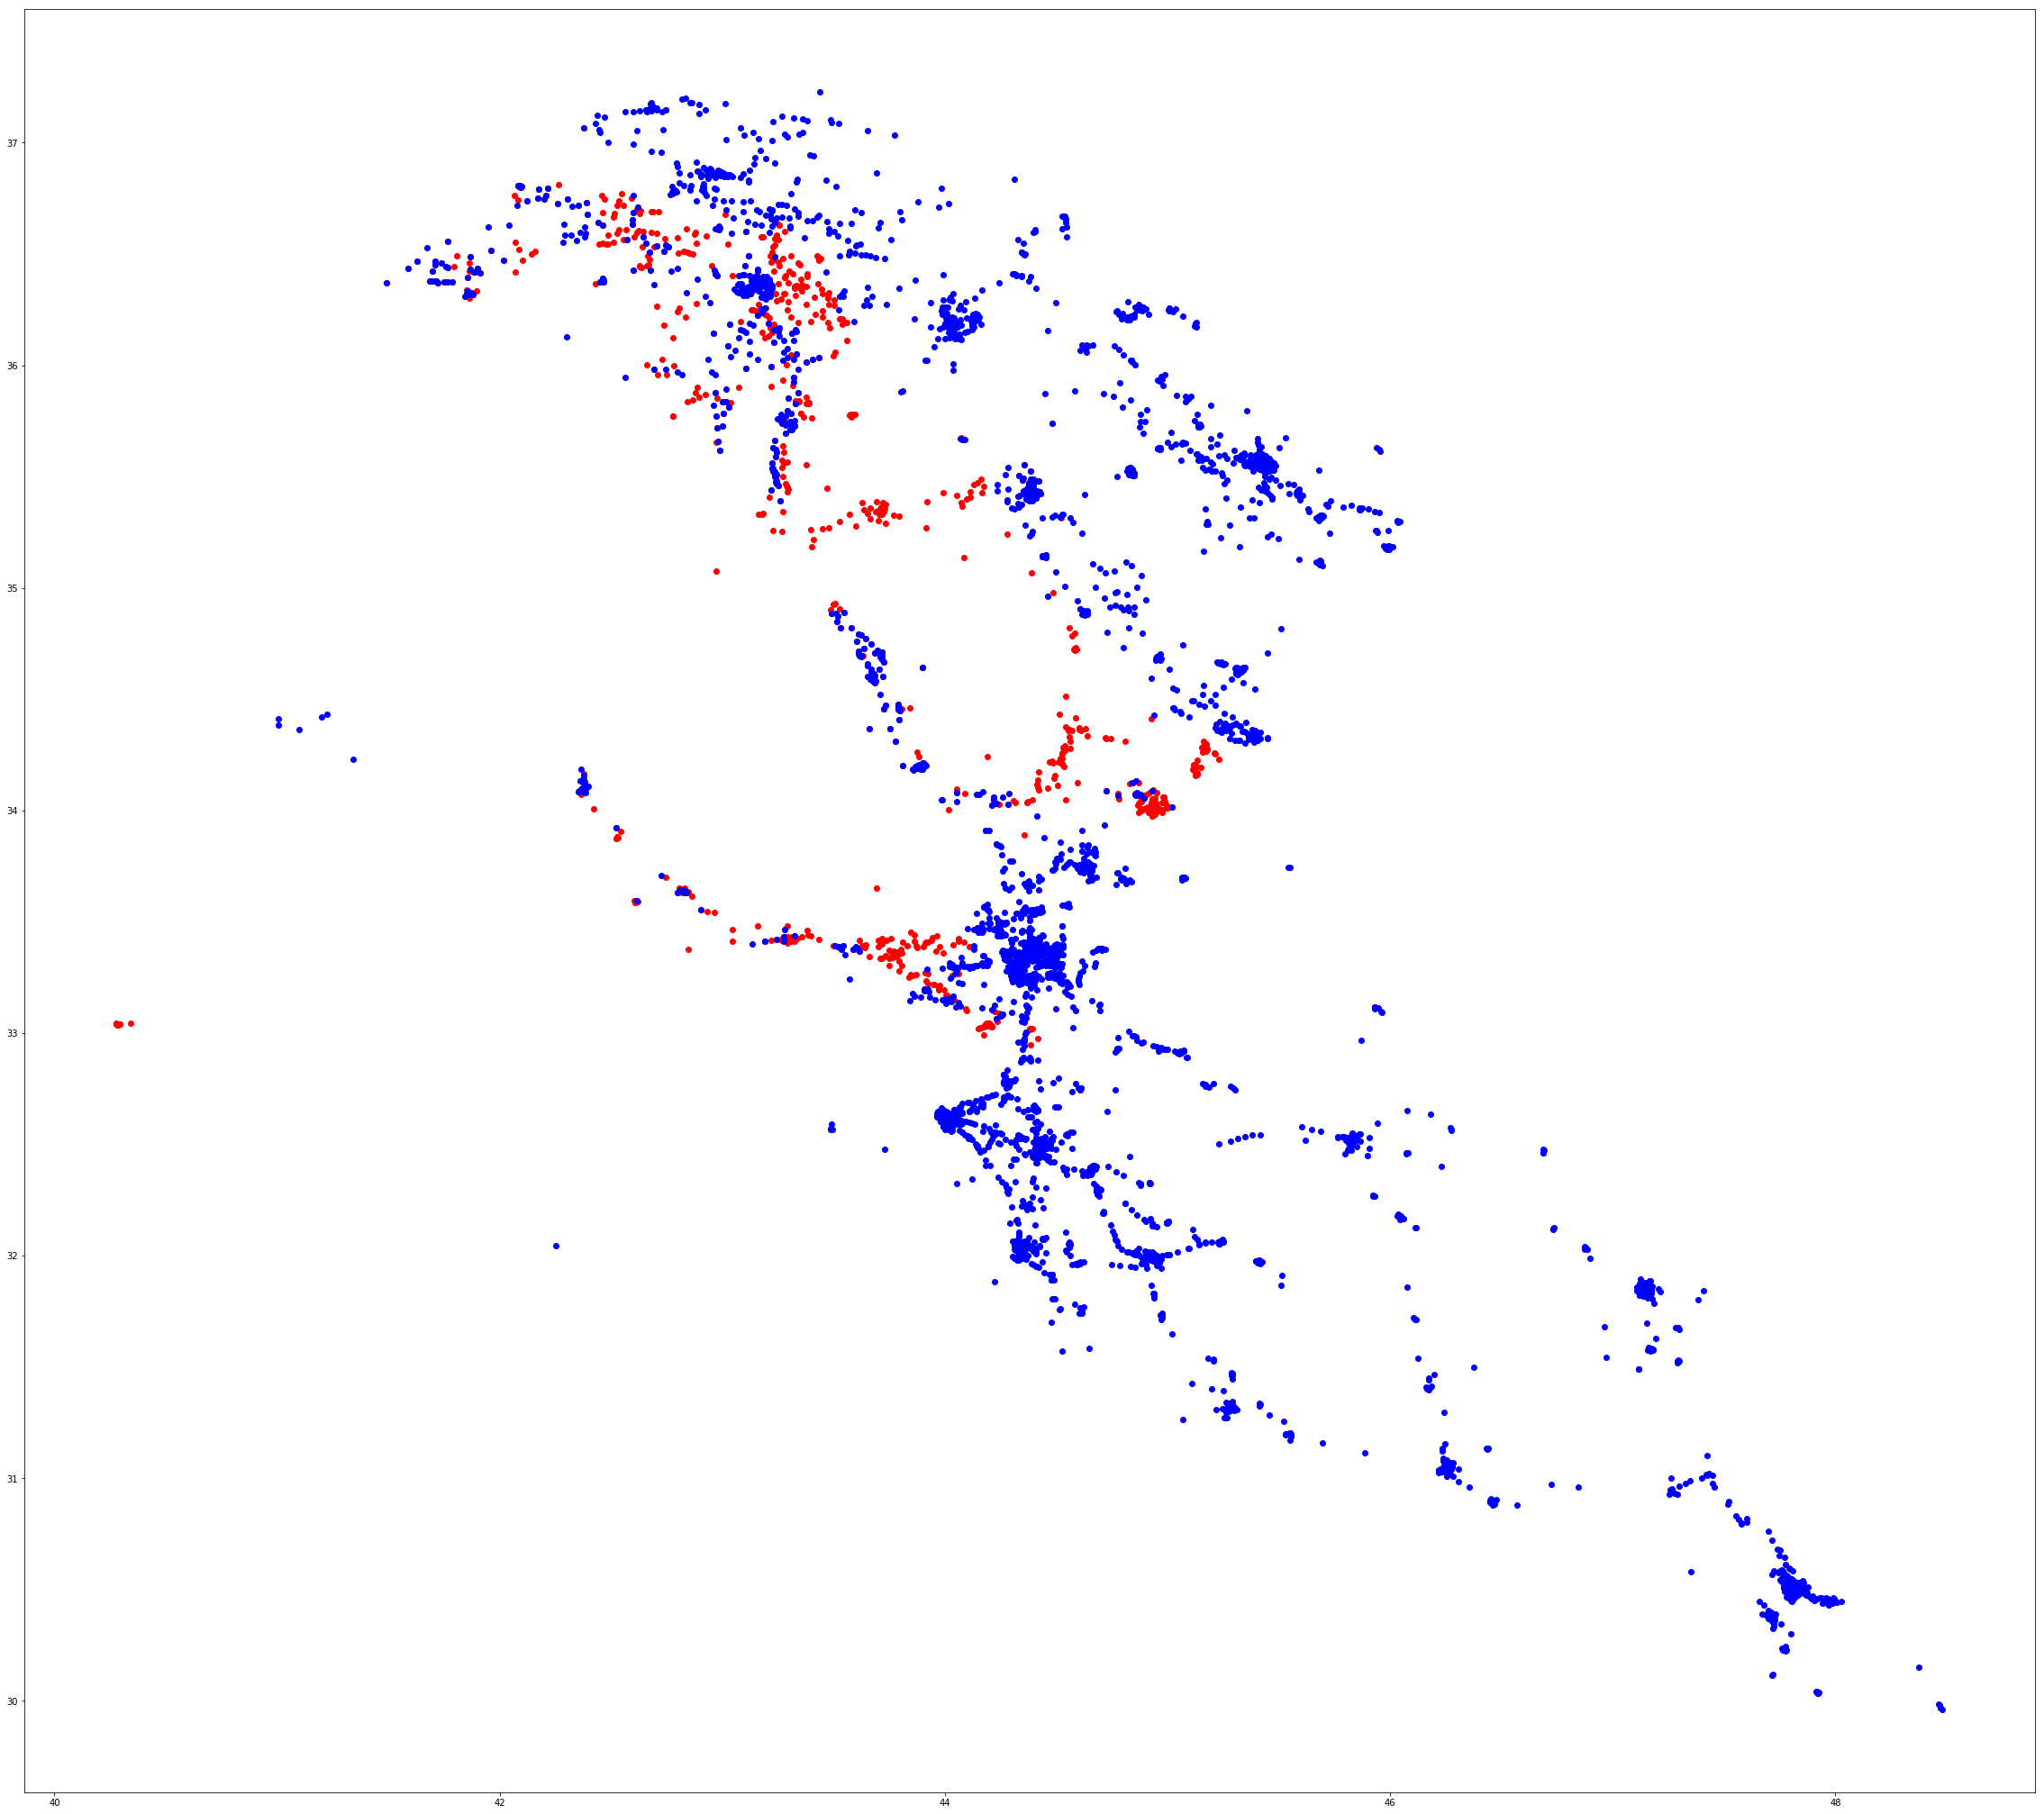

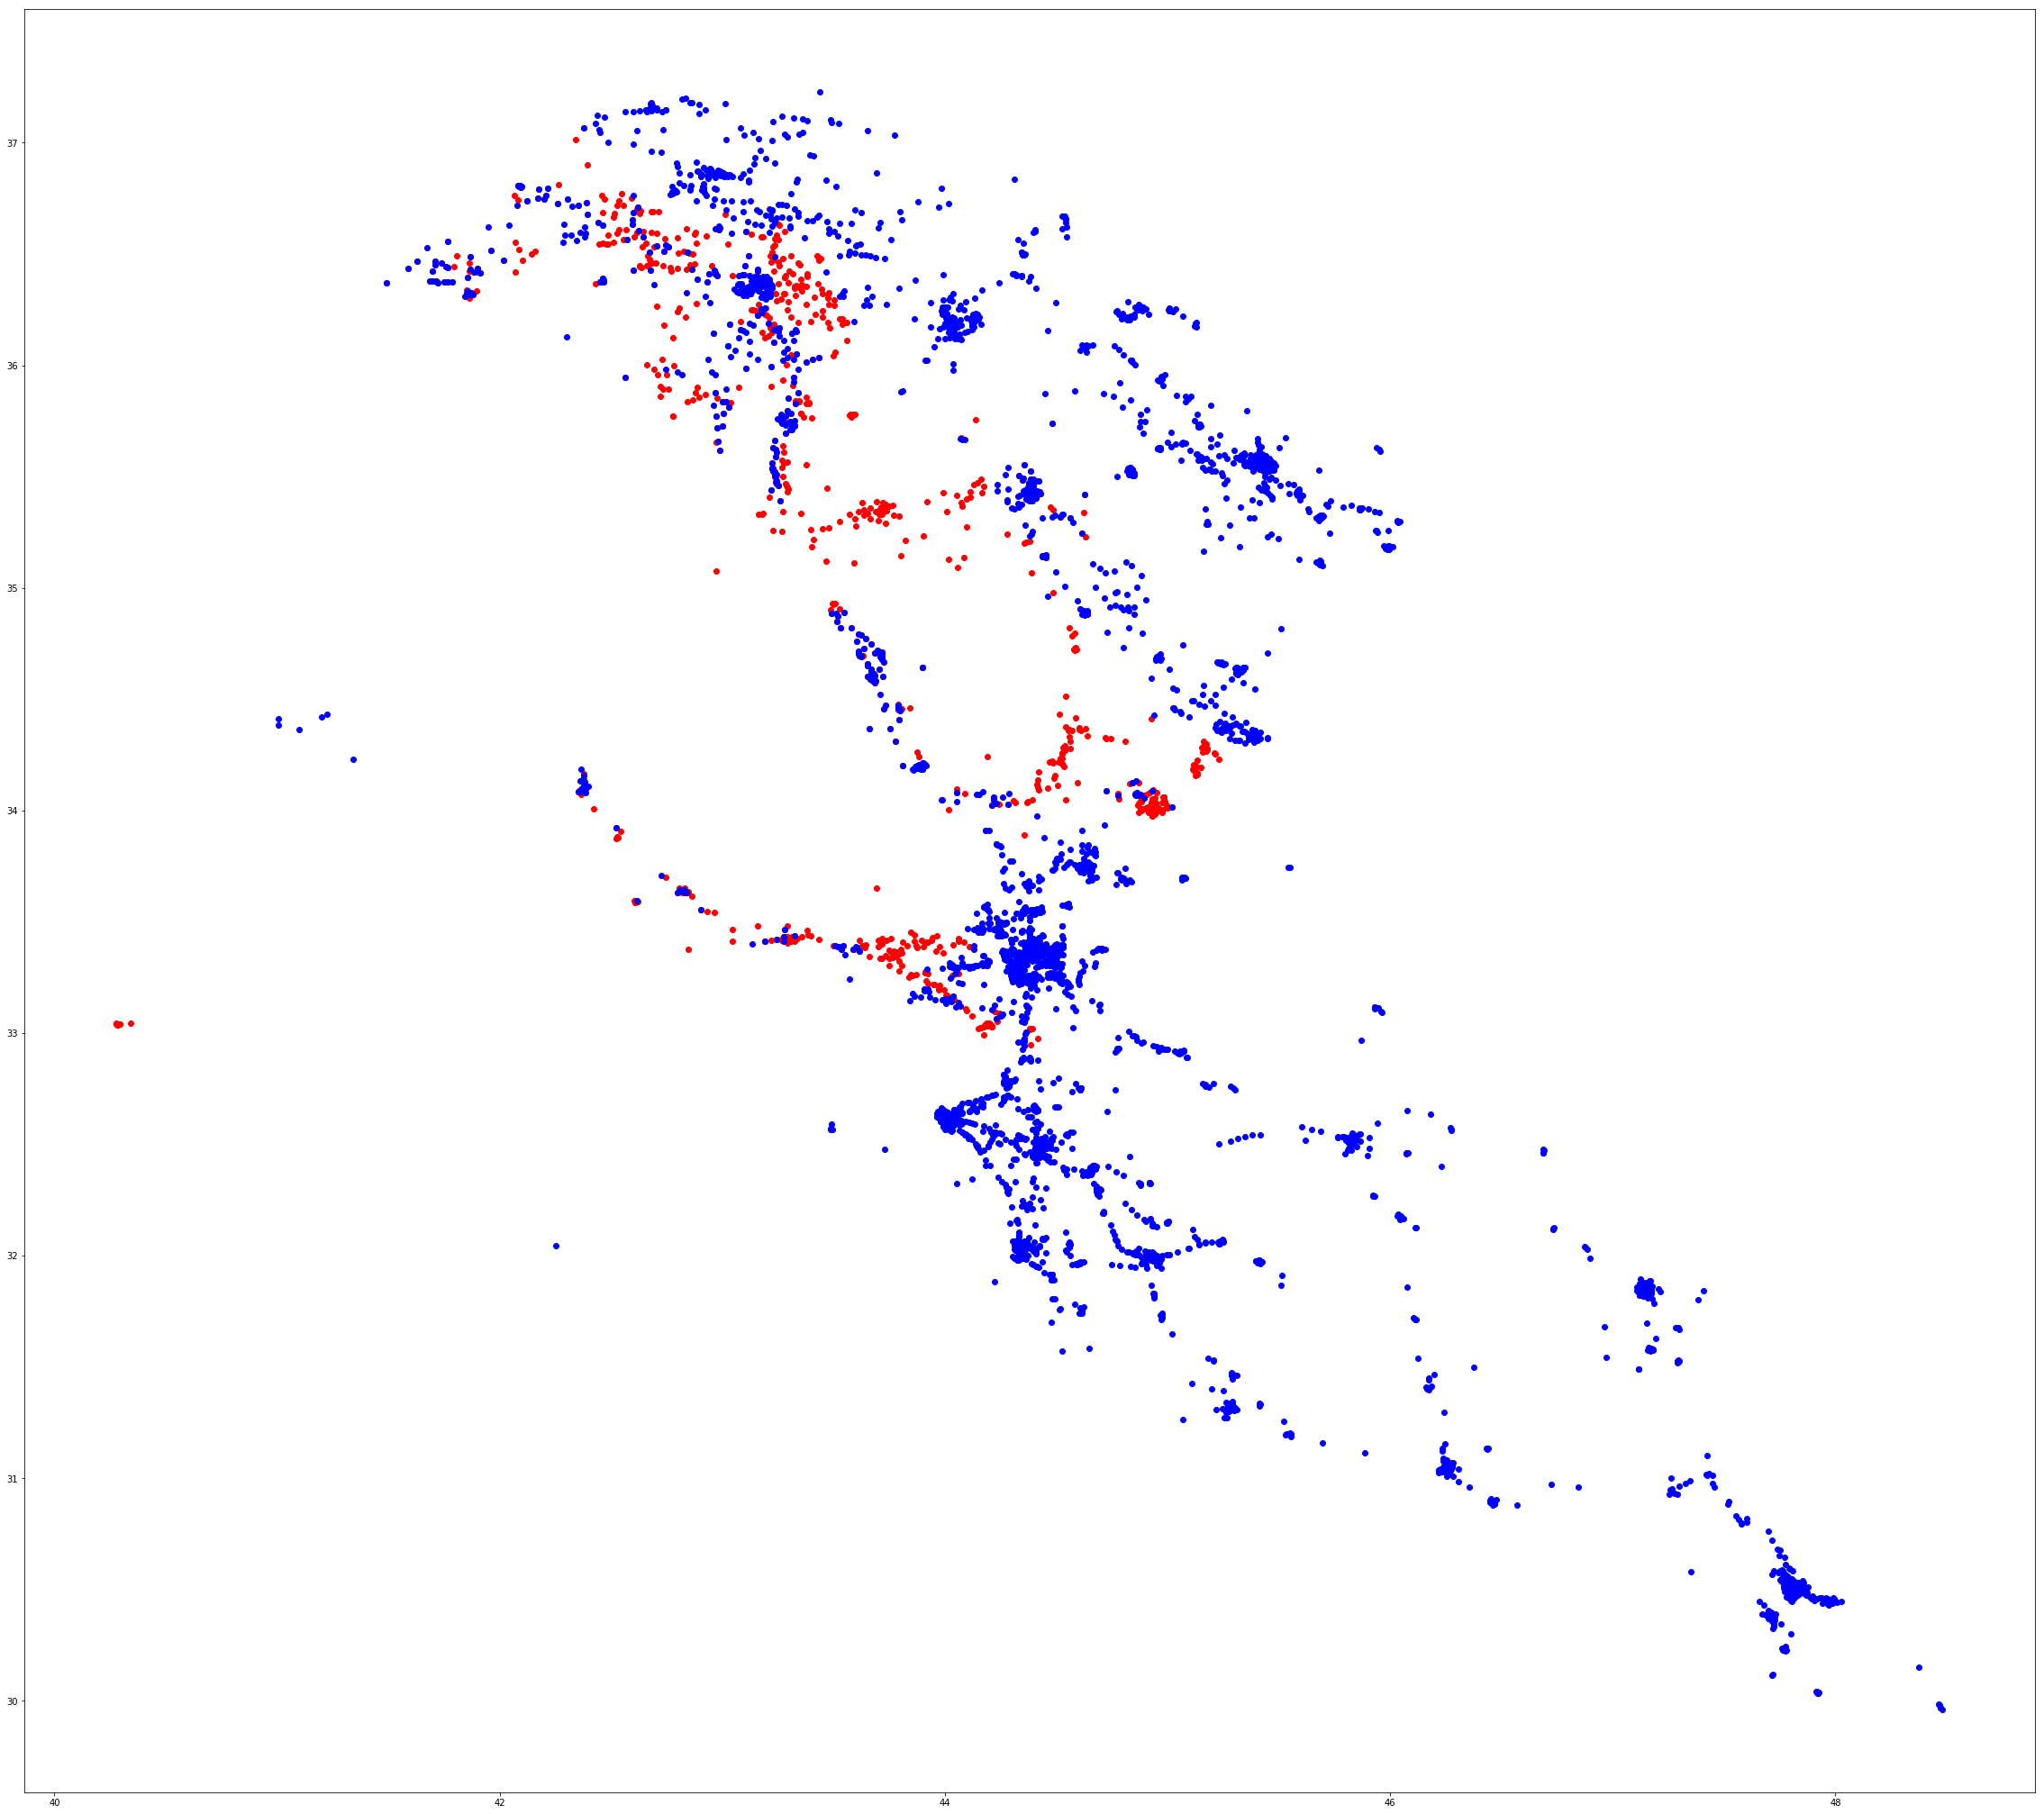

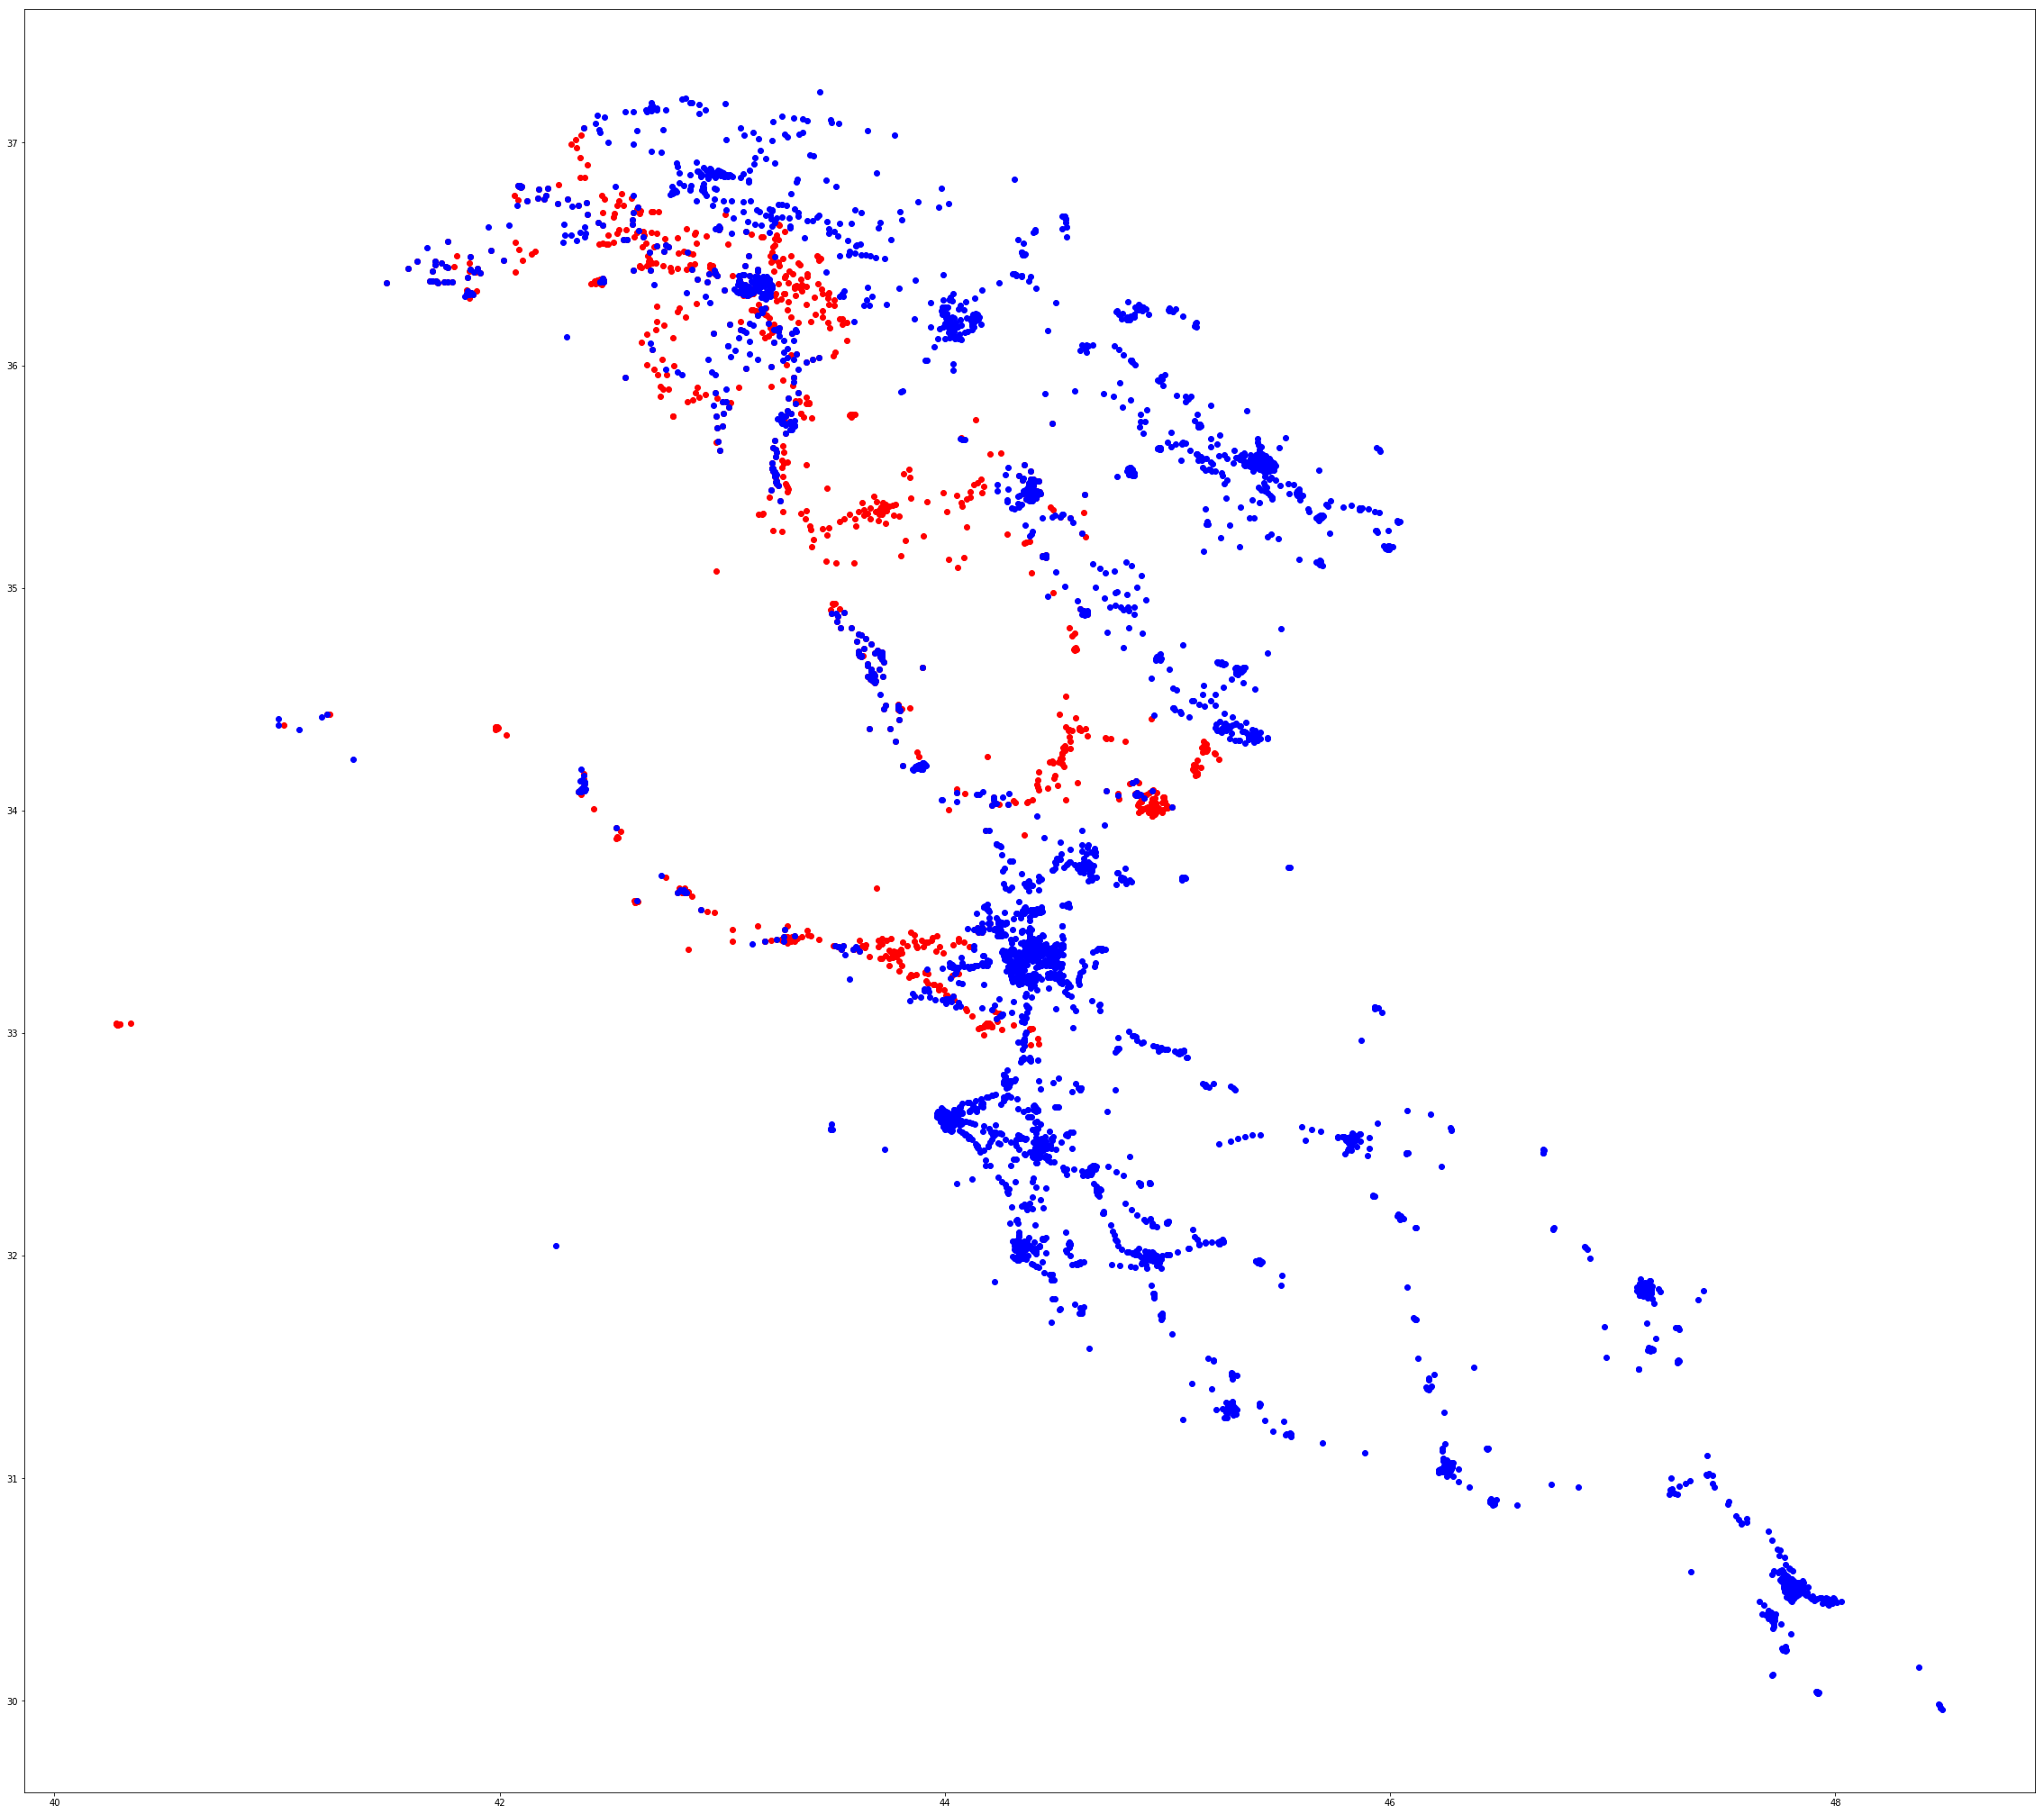

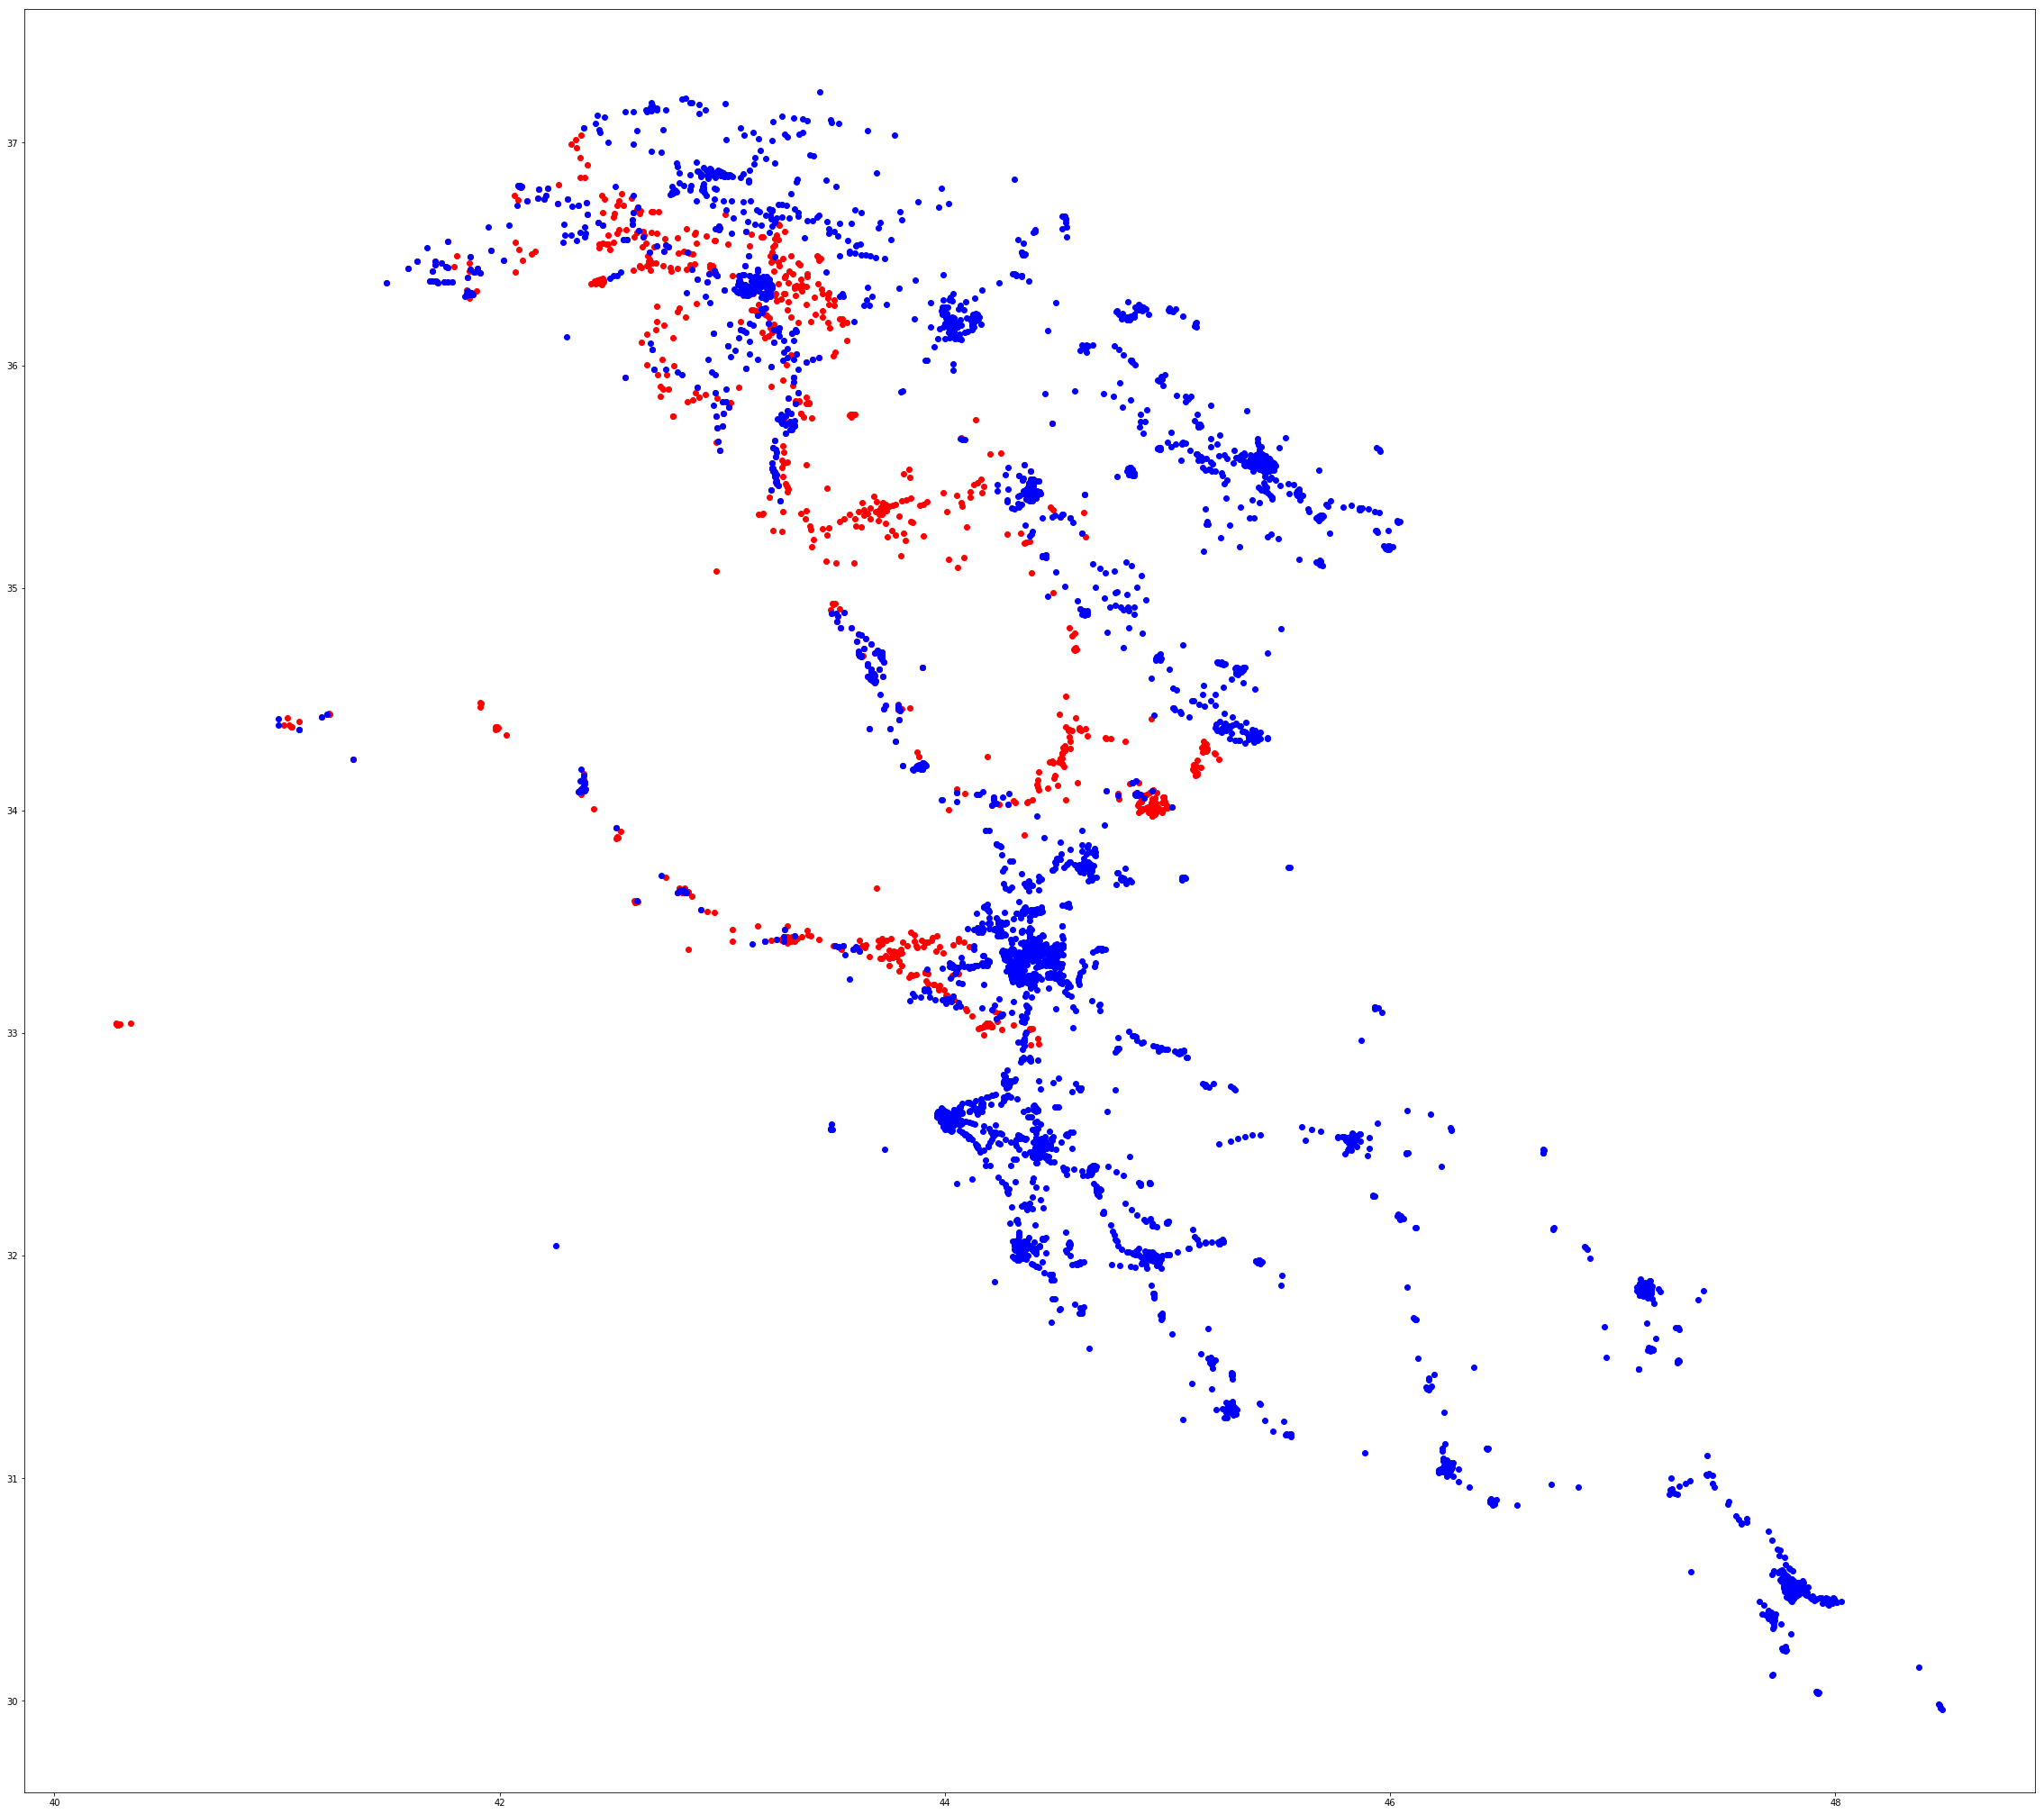

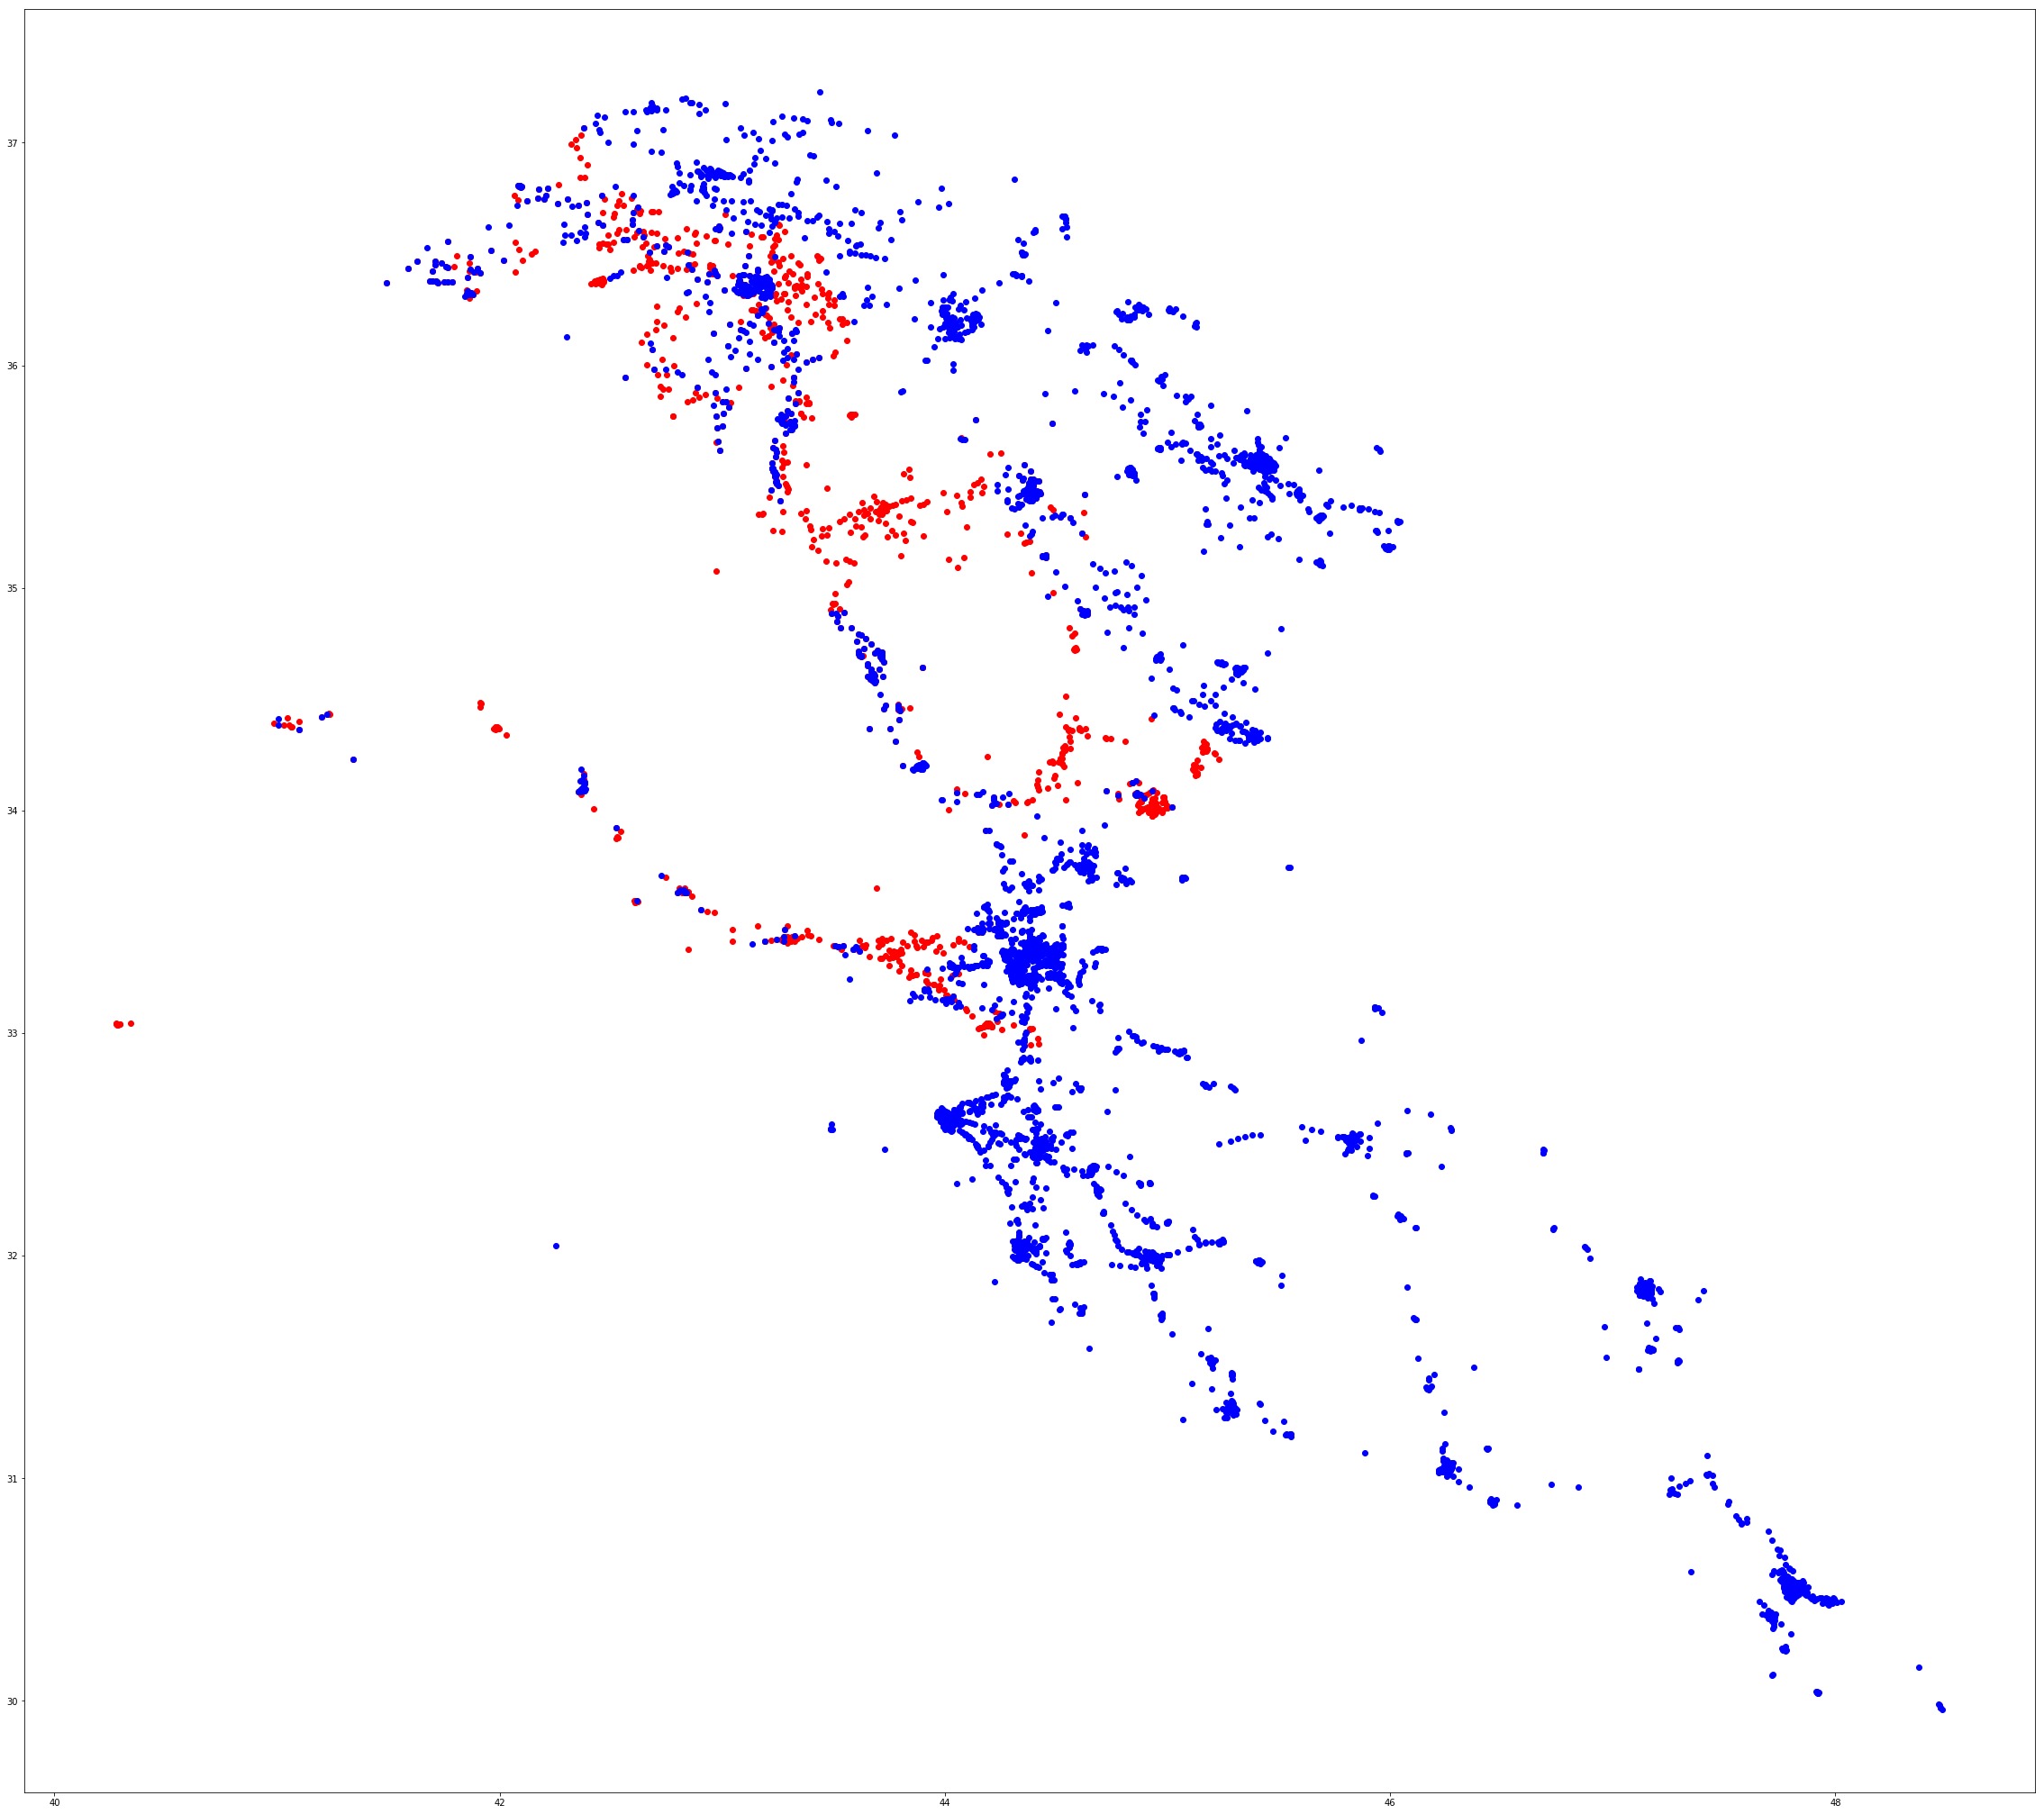

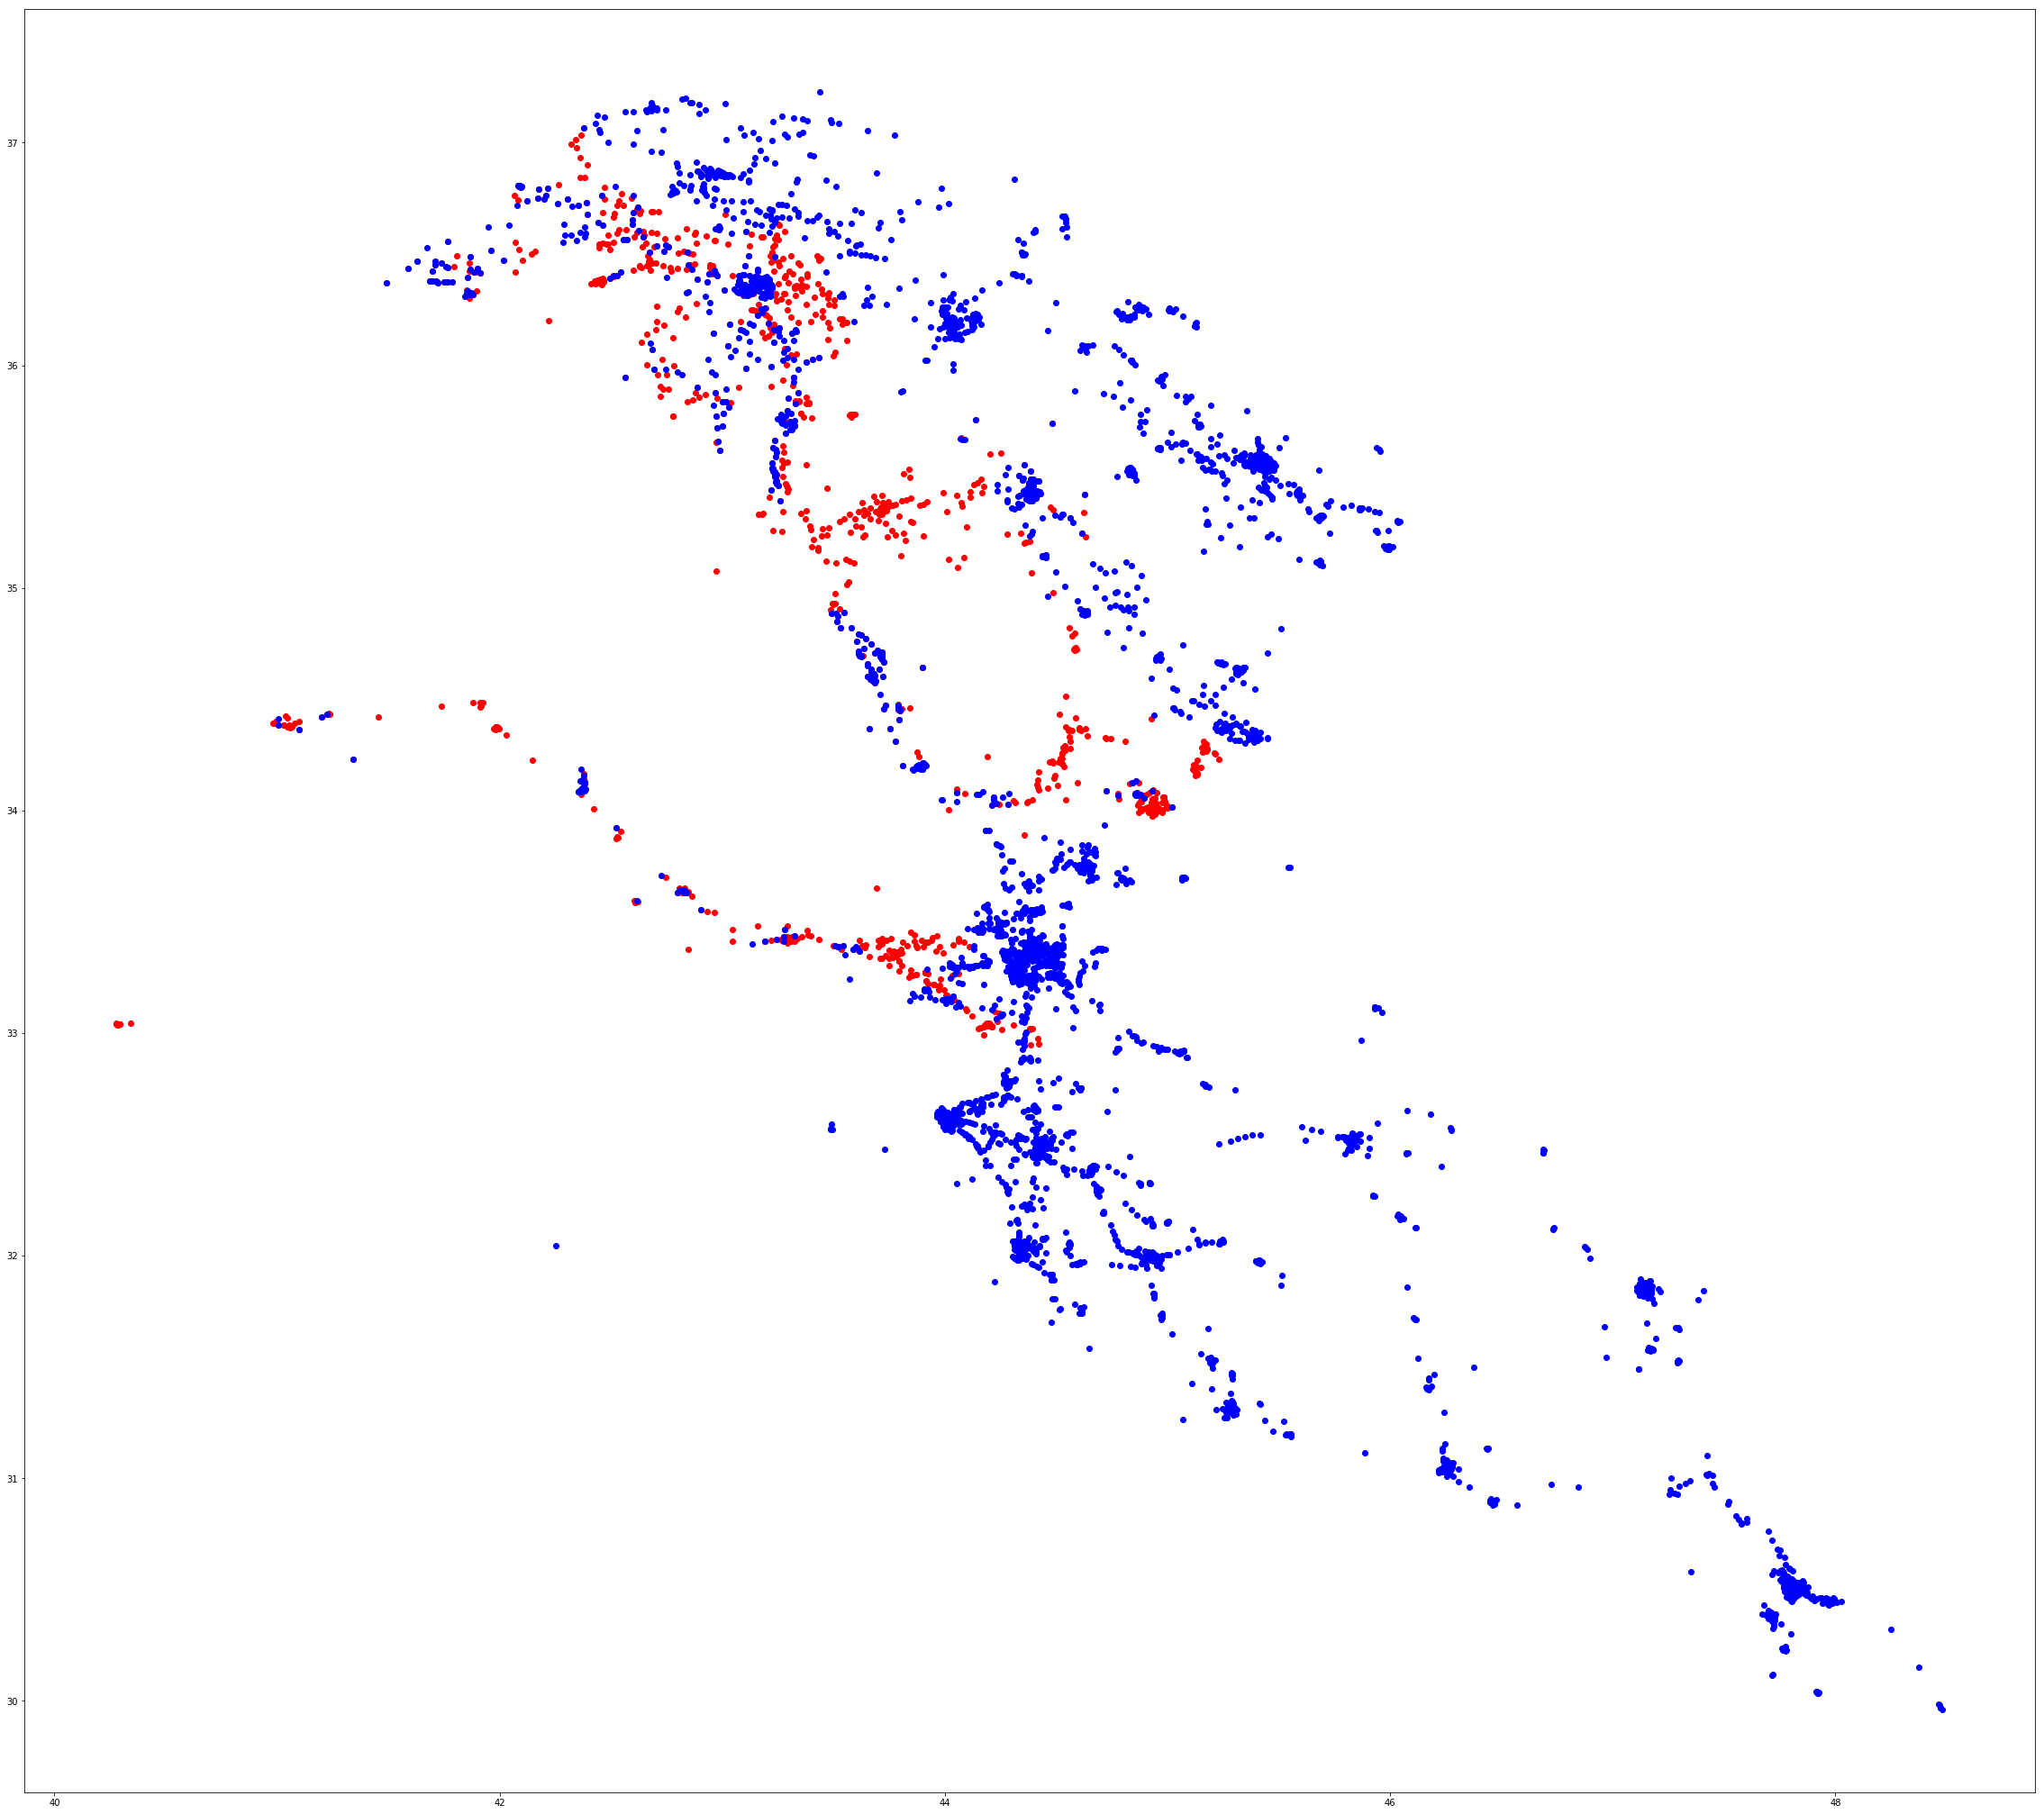

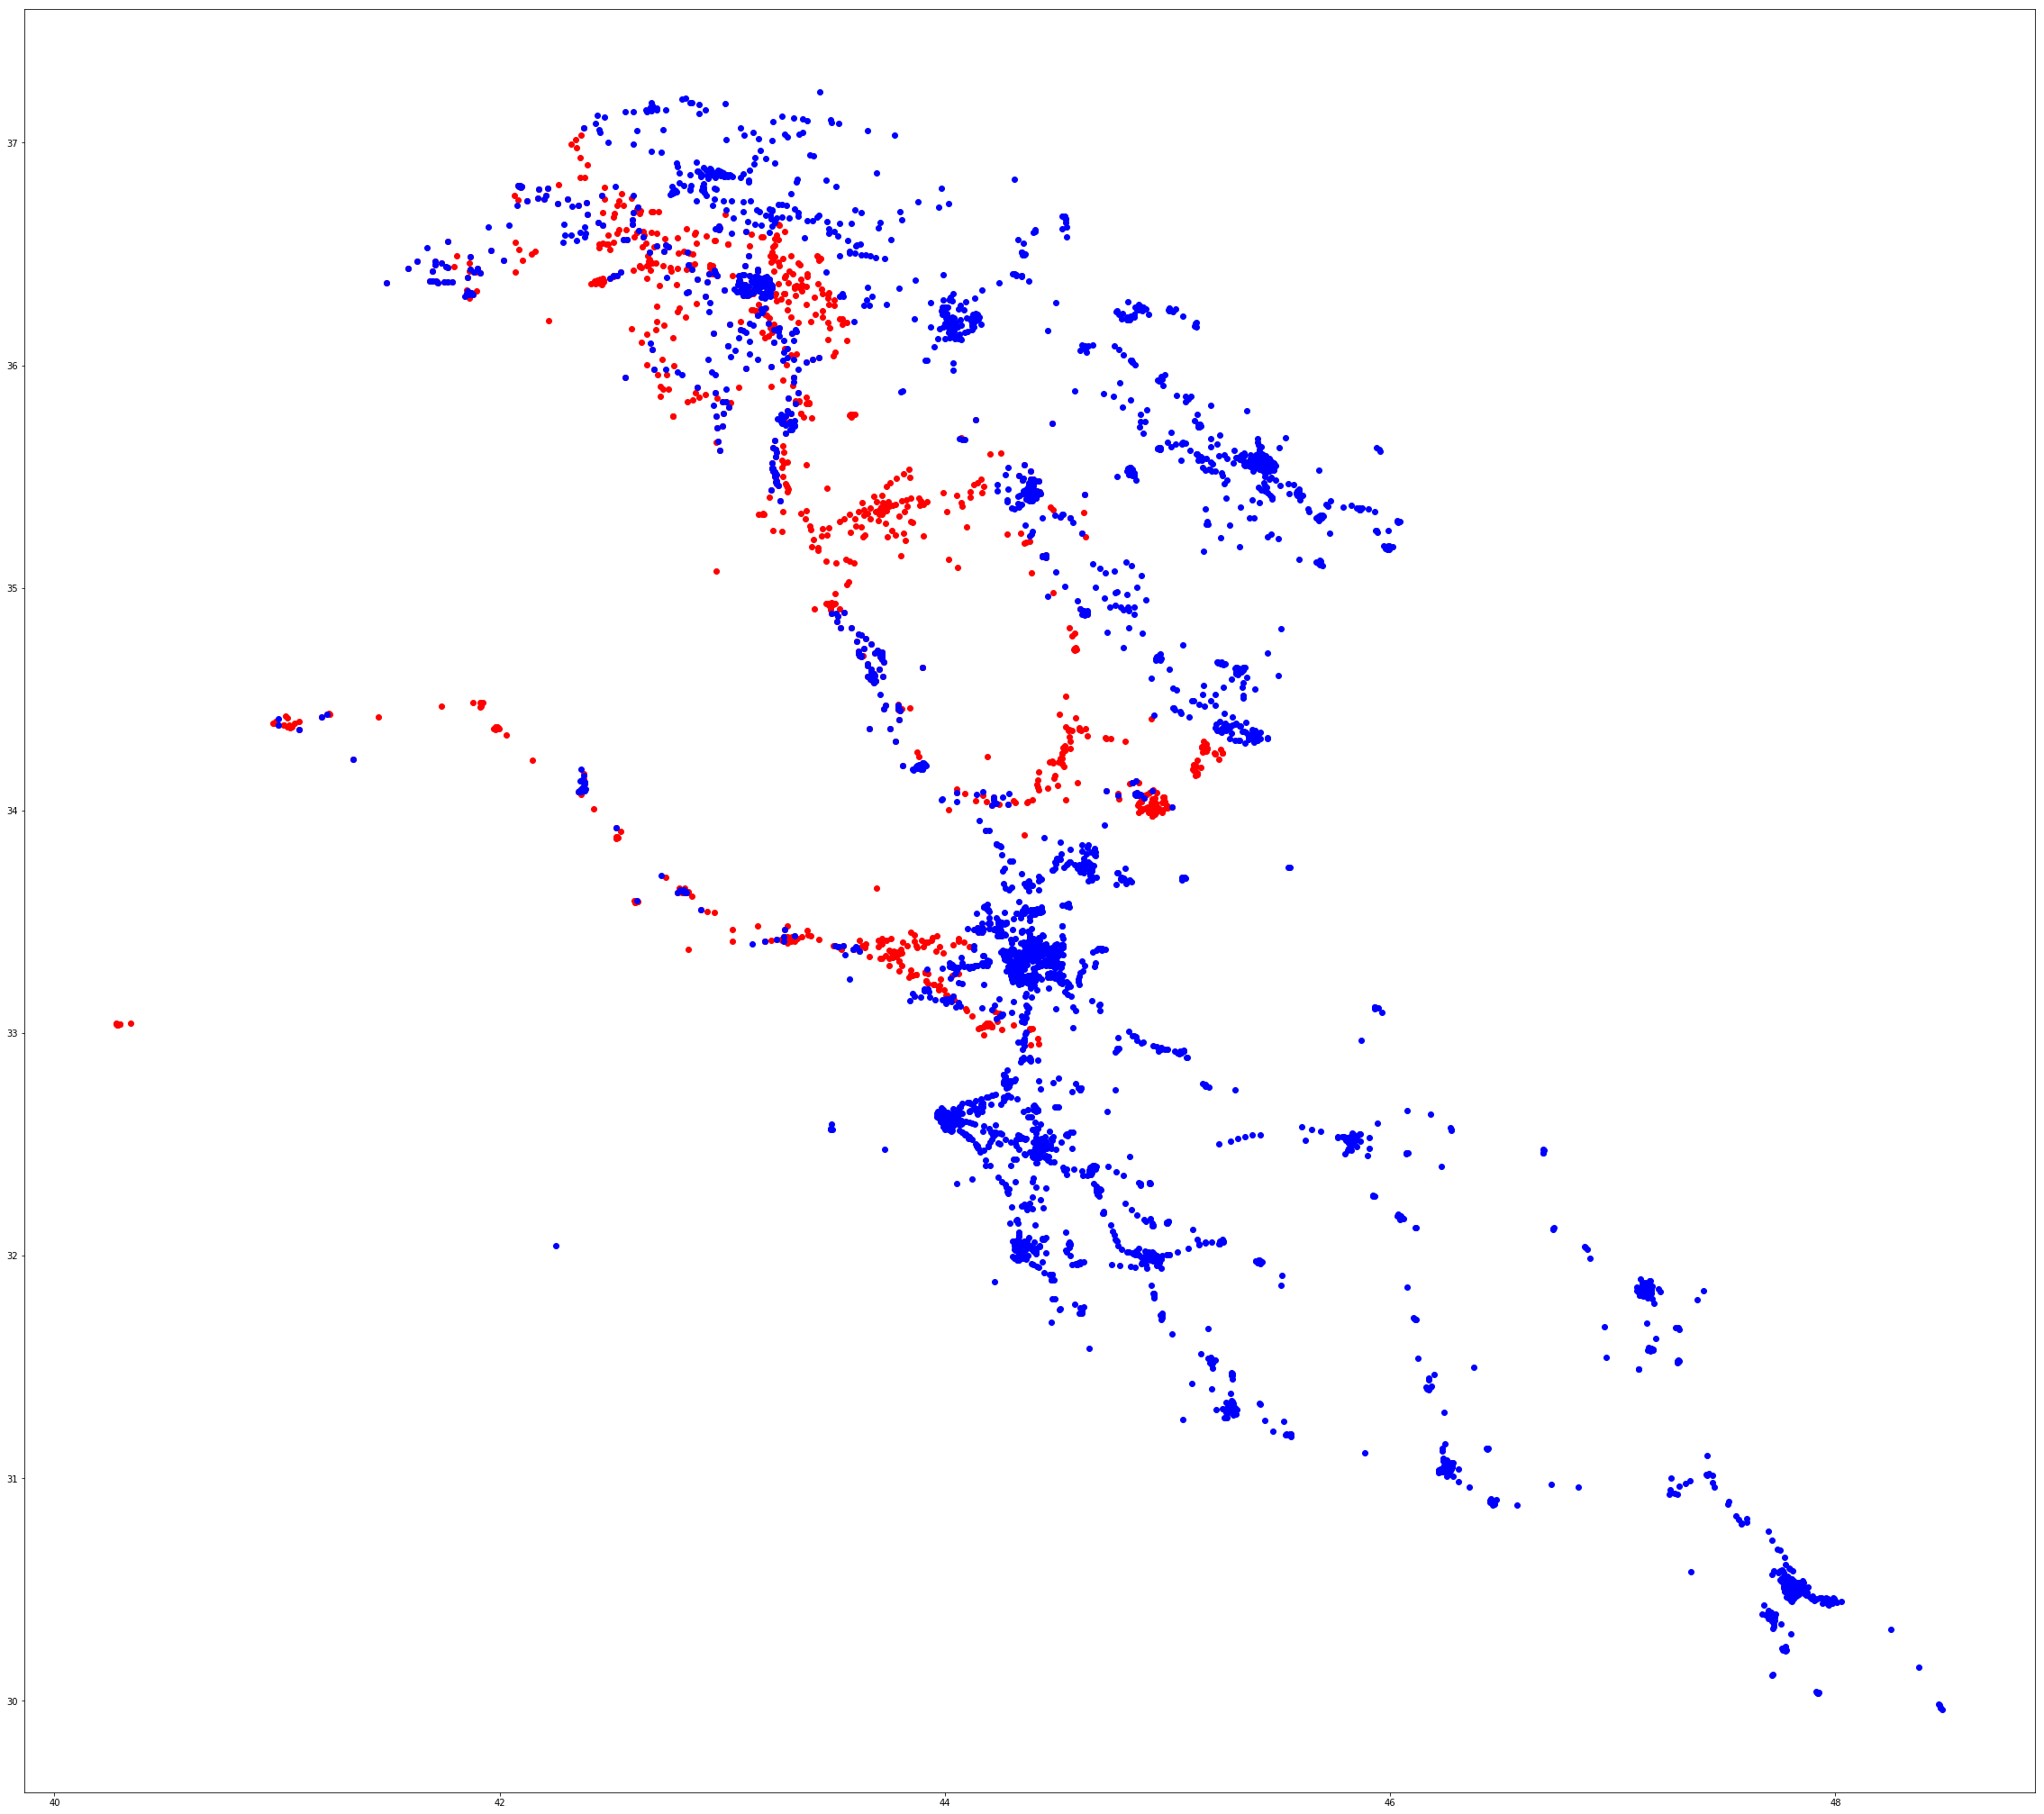

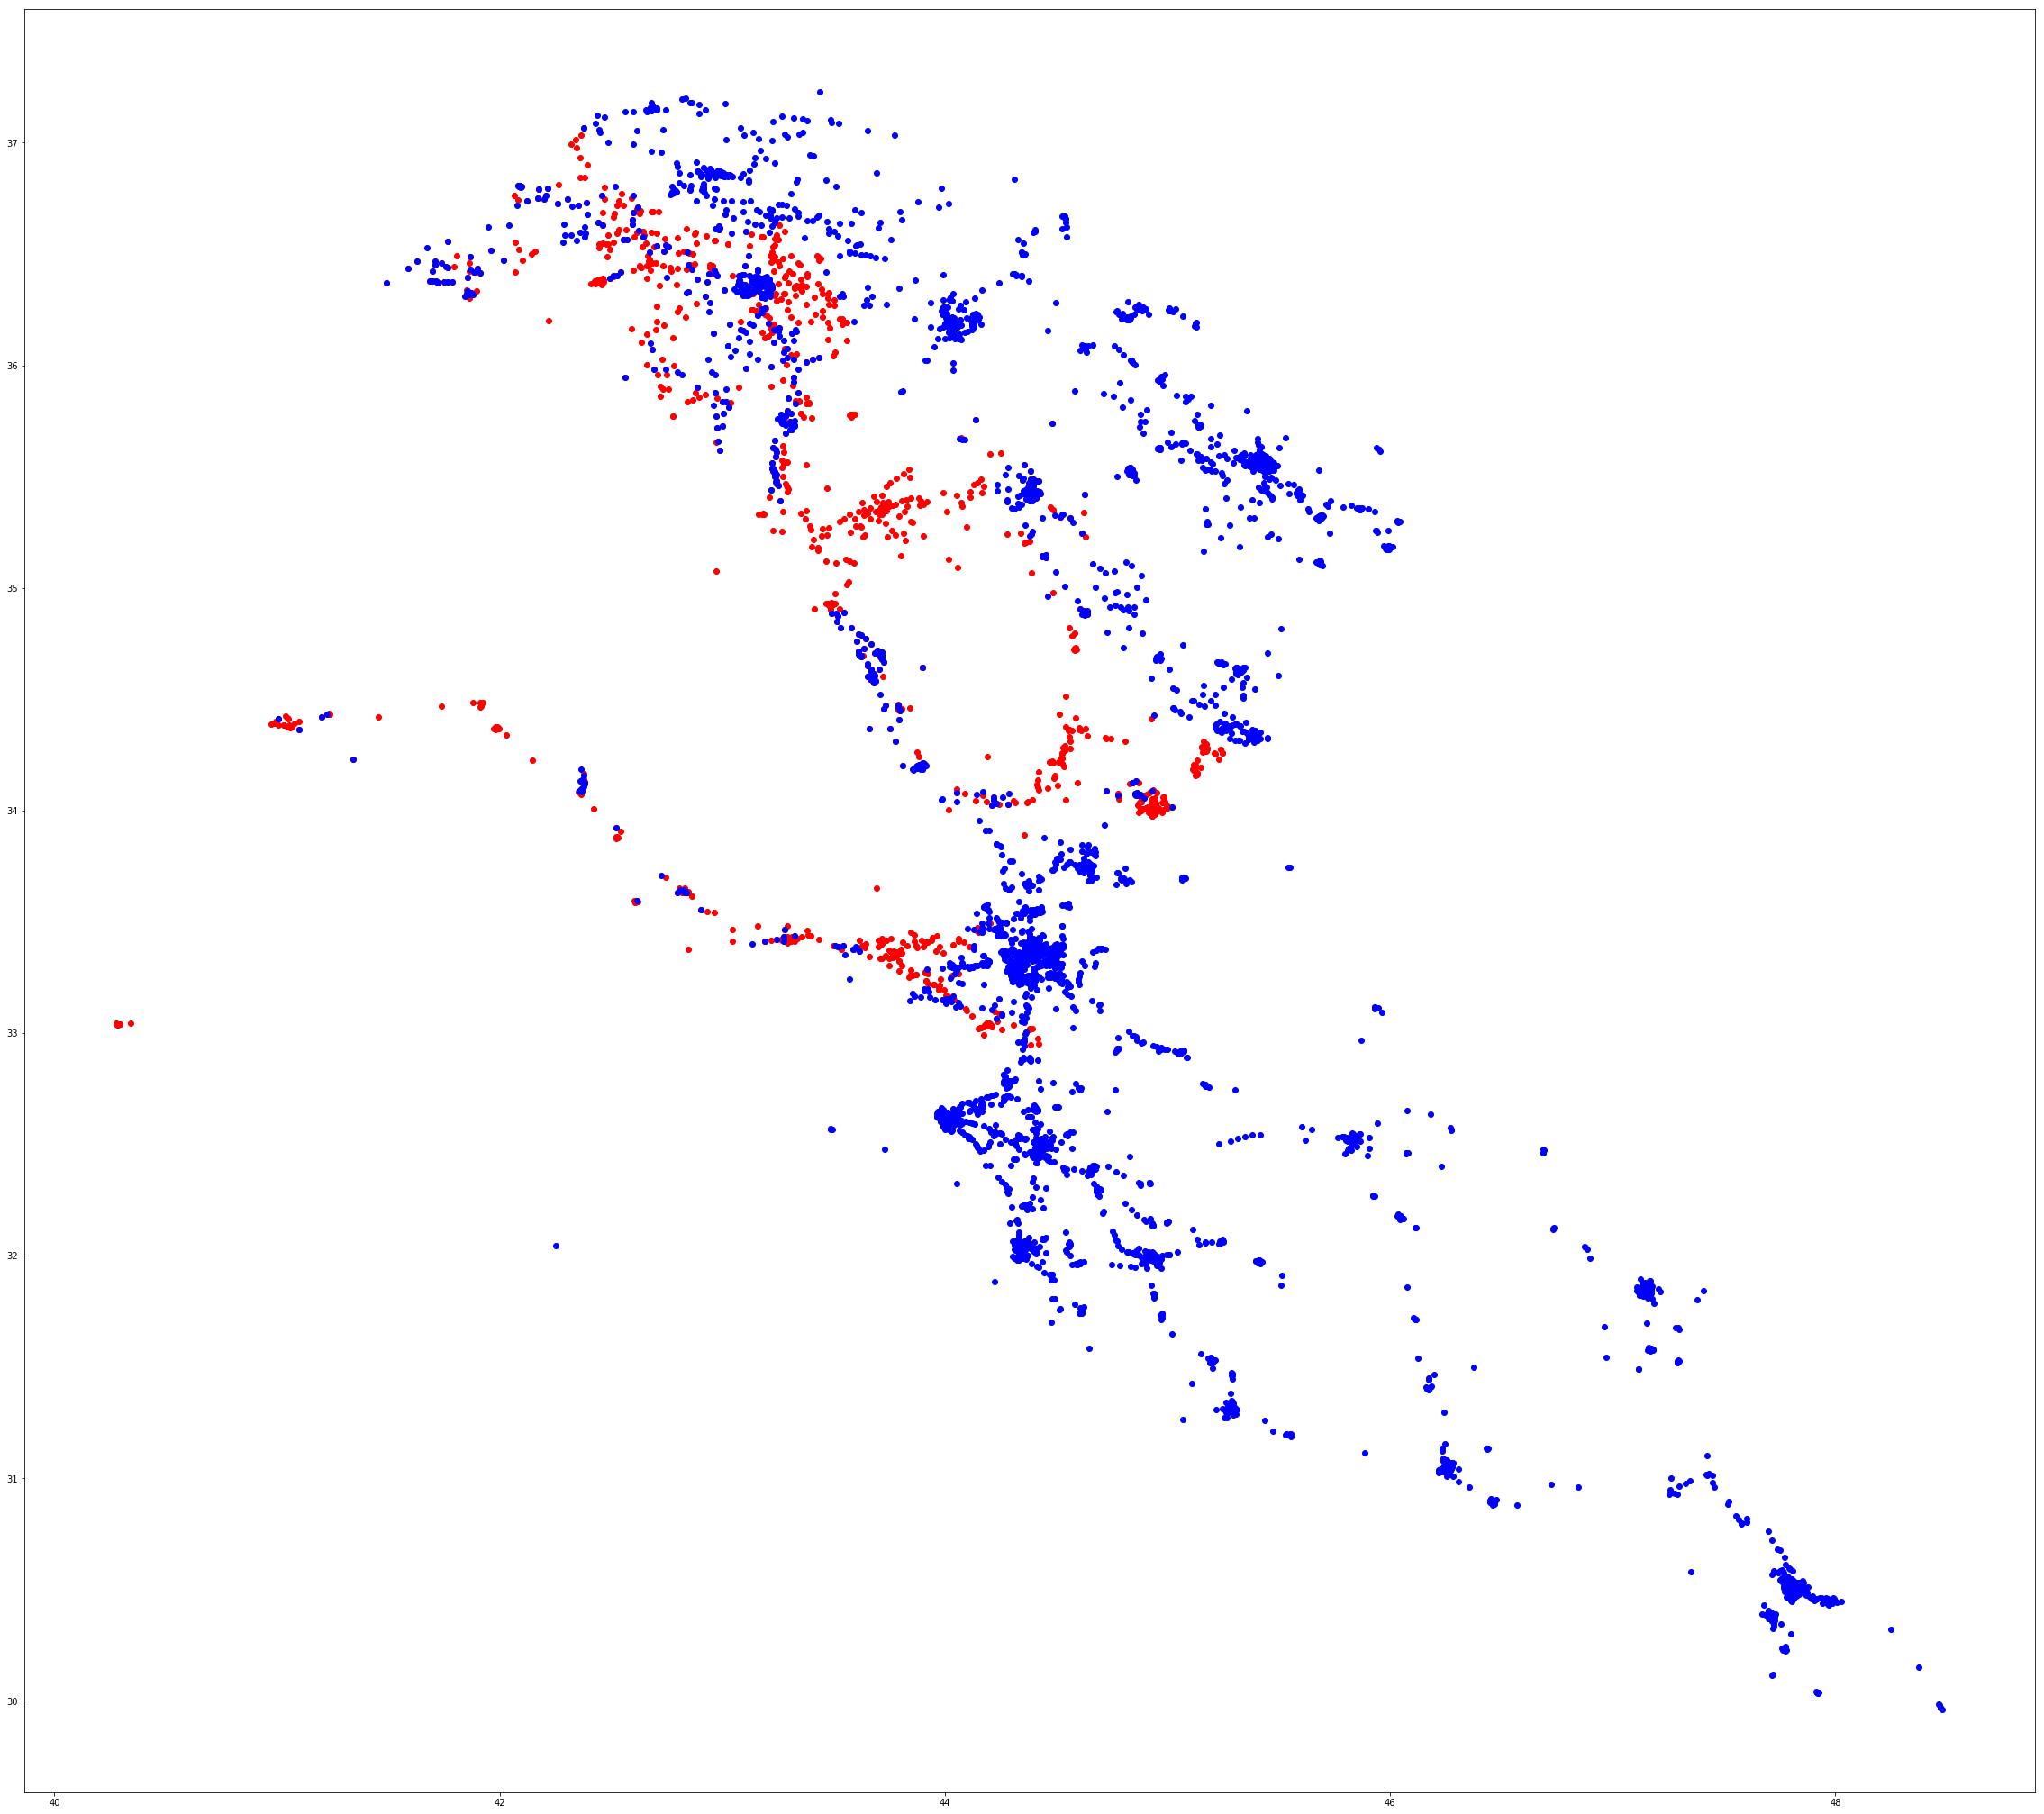

In [7]:
for i in range(84, 92):
    d91 = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r91 = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    plot_map(d91, r91, str(i))

# Network analysis

import networkx as nx
import osmnx as ox

for i in range(84, 92):
    d = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    break
#https://en.wikipedia.org/wiki/Districts_of_Iraq#Anbar_Governorate

def make_map_from_osmnx():
    places = ["Anbar, Iraq",
             "Nineweh, Iraq"]
    G = ox.graph_from_file("data/iraq-latest.osm")
    #G = gdf_from_place("Iraq")
    #G = ox.graph_from_place(places, network_type='all', retain_all = True)
    print('got graph')
    #G_projected = ox.project_graph(G)
    print('projected')
    #ox.save_graphml(G_projected, filename= "_".join(places) + '.graphml')
    print('saved graphml')
    #fig, ax = ox.plot_graph(G_projected, show=False, save=True, 
                          #filename="_".join(places), file_format='png')


make_map_from_osmnx()

# Well, that took too long...

# Alternative to network analysis - simulate graph with adjacency matrix

In [ ]:
# use scipy sparse matrices

# Getting ACLED DATA

In [8]:
acled_link = "https://data.humdata.org/hxlproxy/data.csv?url=https%3A%2F%2Fapi.acleddata.com%2Facled%2Fread.csv%3Flimit%3D0%26iso%3D368&name=ACLEDHXL&tagger-match-all=on&tagger-02-header=iso&tagger-02-tag=%23country%2Bcode&tagger-03-header=event_id_cnty&tagger-03-tag=%23event%2Bcode&tagger-05-header=event_date&tagger-05-tag=%23date%2Boccurred+&tagger-08-header=event_type&tagger-08-tag=%23event%2Btype&tagger-09-header=actor1&tagger-09-tag=%23group%2Bname%2Bfirst&tagger-10-header=assoc_actor_1&tagger-10-tag=%23group%2Bname%2Bfirst%2Bassoc&tagger-12-header=actor2&tagger-12-tag=%23group%2Bname%2Bsecond&tagger-13-header=assoc_actor_2&tagger-13-tag=%23group%2Bname%2Bsecond%2Bassoc&tagger-16-header=region&tagger-16-tag=%23region%2Bname&tagger-17-header=country&tagger-17-tag=%23country%2Bname&tagger-18-header=admin1&tagger-18-tag=%23adm1%2Bname&tagger-19-header=admin2&tagger-19-tag=%23adm2%2Bname&tagger-20-header=admin3&tagger-20-tag=%23adm3%2Bname&tagger-21-header=location&tagger-21-tag=%23loc%2Bname&tagger-22-header=latitude&tagger-22-tag=%23geo%2Blat&tagger-23-header=longitude&tagger-23-tag=%23geo%2Blon&tagger-25-header=source&tagger-25-tag=%23meta%2Bsource&tagger-27-header=notes&tagger-27-tag=%23description&tagger-28-header=fatalities&tagger-28-tag=%23affected%2Bkilled&header-row=1"
acled = pd.read_csv(acled_link)
acled = acled.loc[1:] # Get rid of HUMDATA tags
iq_dist = gpd.read_file('data/Iraq Districts/iraq_districts.shp')
iq_dist.head()

OBJECTID      ADM3NAME ADM3CODE ADM2NAME ADM2CODE     AREA_KM2    PERIM_KM  \
0         1    Al-Shikhan  iq15053   Ninewa     iq15  1304.477640  185.494463   
1         2       Tilkaif  iq15100   Ninewa     iq15  1247.191304  168.651504   
2         3  Al-Hamdaniya  iq15017   Ninewa     iq15  1785.729624  220.723098   
3         4         Mosul  iq15038   Ninewa     iq15  4335.375726  420.809044   
4         5       Telafar  iq15098   Ninewa     iq15  4460.156834  424.953377   

                                            geometry  
0  POLYGON ((43.31855266299995 36.93143885000006,...  
1  POLYGON ((43.16658700899989 36.78658700400008,...  
2  POLYGON ((43.38058472199994 36.54517364900005,...  
3  POLYGON ((42.74877737399935 36.53786930100007,...  
4  POLYGON ((42.8729421619996 36.71218868700004, ...

In [9]:

def make_adj_mat(polys, get_adjacencies):
    adj_results = []
    num_rows = 0

    for i in polys['geometry']:
        adj_results.append(get_adjacencies(i))
        num_rows += 1

    return np.identity(num_rows) + np.matrix(adj_results) # because all polgyons are self-adjacent

#adj_mat = make_adj_mat(iq_dist, get_adjacencies)

In [10]:
def get_adjacencies(district):
    adj_list = iq_dist['geometry'].touches(district)
    bool_transform = lambda x: 1 if x == True else 0
    return [bool_transform(i) for i in adj_list]


In [11]:

def random_walker(adj_matrix, start, walk, remaining_length):
    # ref https://medium.com/@sddkal/random-walks-on-adjacency-matrices-a127446a6777
    # ref discussion with reid
    
    if remaining_length == 0:
        return walk
    else:
        indexer = len(walk) % 2
        if indexer == 0:
            selection = adj_matrix[start, :]  # hold row constant
        else:
            selection = adj_matrix[:, start]  # hold col constant
        
        indices = np.arange(max(selection.shape))
        # the probabilities should be the actual values of the matrix
        
        #prob = [i/selection.sum() for i in selection.flat]
        prob = selection.flat
        
        end = choice(indices, p = prob) # probs must be 1-d
            
        walk.append((start, end))  # NOT indices - trip information
              
        walk =  random_walker(adj_matrix, end, walk, remaining_length - 1)
        
        return walk

In [12]:
def make_walk(adj_mat, start, num_steps):
    walk_record = random_walker(adj_mat, start, [], num_steps)
    #return [(places[i], places[j]) for i, j in walk_record]
    return walk_record


In [13]:
acled.head()

data_id  iso event_id_cnty  event_id_no_cnty  event_date    year  \
1  723718.0  368       IRQ6029            6029.0  2018-03-24  2018.0   
2  723747.0  368       IRQ6030            6030.0  2018-03-24  2018.0   
3  723717.0  368       IRQ6028            6028.0  2018-03-23  2018.0   
4  723743.0  368       IRQ6019            6019.0  2018-03-23  2018.0   
5  723744.0  368       IRQ6022            6022.0  2018-03-23  2018.0   

   time_precision                     event_type  \
1             1.0  Battle-No change of territory   
2             1.0                Remote violence   
3             1.0  Battle-No change of territory   
4             1.0                Remote violence   
5             1.0                Remote violence   

                            actor1 assoc_actor_1 ...           location  \
1             Islamic State (Iraq)           NaN ...             Kirkuk   
2  Unidentified Armed Group (Iraq)           NaN ...           Sharwain   
3             Islamic State (Iraq)           NaN ...   Nahiyat ar Riyad   
4  Unidentified Armed Group (Iraq)           NaN ...            An Nada   
5             Islamic State (Iraq)           NaN ...             Kirkuk   

  latitude longitude  geo_precision  \
1  35.4681   44.3922            3.0   
2  34.0552   44.8879            1.0   
3   35.269   43.9108            1.0   
4  33.8625   45.2874            1.0   
5  35.4681   44.3922            1.0   

                                            source source_scale  \
1                              Anadolu Agency (AA)     Regional   
2                National Iraqi News Agency (NINA)     National   
3  Amaq (Telegram messaging application in Arabic)  Other-Local   
4                              Anadolu Agency (AA)     Regional   
5                                        Sotaliraq     National   

                                               notes fatalities     timestamp  \
1  On Mar 24, at least eight police officers were...          8  1.522102e+09   
2  On Mar 24, a member of the TMF was killed and ...          1  1.522102e+09   
3  On Mar 23, IS militants destroyed 4 PMF vehicl...          0  1.522102e+09   
4  On Mar 23, at least four Iraqi soldiers were k...          4  1.522102e+09   
5  On Mar 23, an IED planted roadside, suspected ...          0  1.522102e+09   

  iso3  
1  IRQ  
2  IRQ  
3  IRQ  
4  IRQ  
5  IRQ  

[5 rows x 30 columns]

# Try simulation with equal probs

In [14]:
point_list = []
#acled = acled[acled['']]
for i in acled.itertuples():
    point_list.append(Point(float(i.longitude), float(i.latitude)))
acled['geometry'] = point_list
acled_geo = gpd.GeoDataFrame(acled)

adj_mat = make_adj_mat(iq_dist)

result_list = []
for i in acled_geo.itertuples():
    check = iq_dist['geometry'].contains(i.geometry)
    result_list.append(iq_dist.loc[check])

places = dict(iq_dist['ADM3NAME'])


TypeError: make_adj_mat() missing 1 required positional argument: 'get_adjacencies'

In [90]:
walks = []
for i in result_list:
    val = i["OBJECTID"].values
    if len(val) == 1:
        walks.append(make_walk(adj_mat, val[0] - 1 , 100, places))

NameError: name 'result_list' is not defined

In [ ]:
G=nx.Graph()
ctr = iq_dist['geometry'].centroid
loc_list = []

for i in iq_dist.itertuples():
    place = i.ADM3NAME
    ctr = i.geometry.centroid
    G.add_node(place, pos = (ctr.x, ctr.y))

for walk in walks:
    G.add_edges_from(walk)

In [ ]:
nx.draw(G, node_size = 6)
plt.show()


In [ ]:
# https://stackoverflow.com/questions/48235215/how-to-create-a-directed-networkx-graph-from-a-pandas-adjacency-matrix-dataframe
G = nx.Graph()
G = nx.from_numpy_matrix(adj_mat)
nx.draw(G, node_size = 6)
plt.show()



In [15]:
iq_dist2  = iq_dist.copy()
iq_dist2['counts'] = 0

to_do = [dfd, dfr]   # limited for now
for j in to_do:
    for i in j.itertuples():
        check = iq_dist['geometry'].contains(i.points)
        iq_dist2.loc[check, 'counts'] += i.counts
    break

In [16]:
iq_dist2

OBJECTID      ADM3NAME ADM3CODE      ADM2NAME ADM2CODE      AREA_KM2  \
0           1    Al-Shikhan  iq15053        Ninewa     iq15   1304.477640   
1           2       Tilkaif  iq15100        Ninewa     iq15   1247.191304   
2           3  Al-Hamdaniya  iq15017        Ninewa     iq15   1785.729624   
3           4         Mosul  iq15038        Ninewa     iq15   4335.375726   
4           5       Telafar  iq15098        Ninewa     iq15   4460.156834   
5           6         Sumel  iq08096         Dahuk     iq08   1375.238723   
6           7         Dahuk  iq08069         Dahuk     iq08    988.379359   
7           8          Akre  iq15005        Ninewa     iq15   2861.029204   
8           9         Erbil  iq11071         Erbil     iq11   2894.111910   
9          10      Al-Ba'aj  iq15008        Ninewa     iq15   7684.872527   
10         11        Sinjar  iq15093        Ninewa     iq15   4925.301620   
11         12         Hatra  iq15020        Ninewa     iq15   8911.157370   
12         13           Ana  iq01059         Anbar     iq01  10484.040314   
13         14         Zakho  iq08102         Dahuk     iq08   1451.063084   
14         15    Al-Shirqat  iq18054  Salah al-Din     iq18   1413.898122   
15         16         Baiji  iq18062  Salah al-Din     iq18   6765.920742   
16         17       Haditha  iq01072         Anbar     iq01   5046.636440   
17         18      Khanaqin  iq10077        Diyala     iq10   4796.453810   
18         19         Kifri  iq10078        Diyala     iq10   2927.357004   
19         20     Baladrooz  iq10064        Diyala     iq10   7590.208056   
20         21  Al-Muqdadiya  iq10039        Diyala     iq10   1399.103618   
21         22     Al-Khalis  iq10027        Diyala     iq10   1308.876375   
22         24          Tooz  iq18101  Salah al-Din     iq18   2800.188233   
23         25         Kalar  iq05075  Sulaymaniyah     iq05   2335.187653   
24         26       Ba'quba  iq10060        Diyala     iq10    557.508874   
25         27        Tarmia  iq01009       Baghdad     iq01    458.976096   
26         28         Balad  iq18063  Salah al-Din     iq18   2964.204775   
27         29          Heet  iq01074         Anbar     iq01   6954.034963   
28         30      Al-Rutba  iq01048         Anbar     iq01  93764.535020   
29         31      Al-Ka'im  iq01024         Anbar     iq01   8835.323384   
..        ...           ...      ...           ...      ...           ...   
74         78     Al-Shatra  iq09052       Thi-Qar     iq09   2054.625881   
75         79        Kirkuk  iq13079        Tameem     iq13   3947.966819   
76         80     Al-Hawiga  iq13021        Tameem     iq13   2706.970576   
77         83    Chamchamal  iq05065  Sulaymaniyah     iq05   3638.398564   
78         84      Mergasur  iq11083         Erbil     iq11   1573.357935   
79         85         Amedi  iq08058         Dahuk     iq08   2764.346482   
80         86         Soran  iq11094         Erbil     iq11   2875.201756   
81         87        Choman  iq11066         Erbil     iq11    848.229923   
82         88        Pshdar  iq05085  Sulaymaniyah     iq05   1366.134182   
83         89         Rania  iq05087  Sulaymaniyah     iq05    800.544070   
84         90      Shaqlawa  iq11089         Erbil     iq11   1734.131693   
85         91      Koisnjaq  iq11080         Erbil     iq11   1910.771636   
86         92         Dokan  iq05070  Sulaymaniyah     iq05   1782.878027   
87         93   Sulaymaniya  iq05095  Sulaymaniyah     iq05   2241.648413   
88         94    Sharbazher  iq05090  Sulaymaniyah     iq05   2109.316119   
89         95       Halabja  iq05073  Sulaymaniyah     iq05   1542.662919   
90         96       Penjwin  iq05084  Sulaymaniyah     iq05   1022.816626   
91         97  Darbandihkan  iq05068  Sulaymaniyah     iq05    616.128266   
92         99     Khadamiya  iq01008       Baghdad     iq01    434.582379   
93        100    Abu Ghraib  iq01002       Baghdad     iq01    549.292807   
9

AttributeError: 'Series' object has no attribute 'autoscale_None'

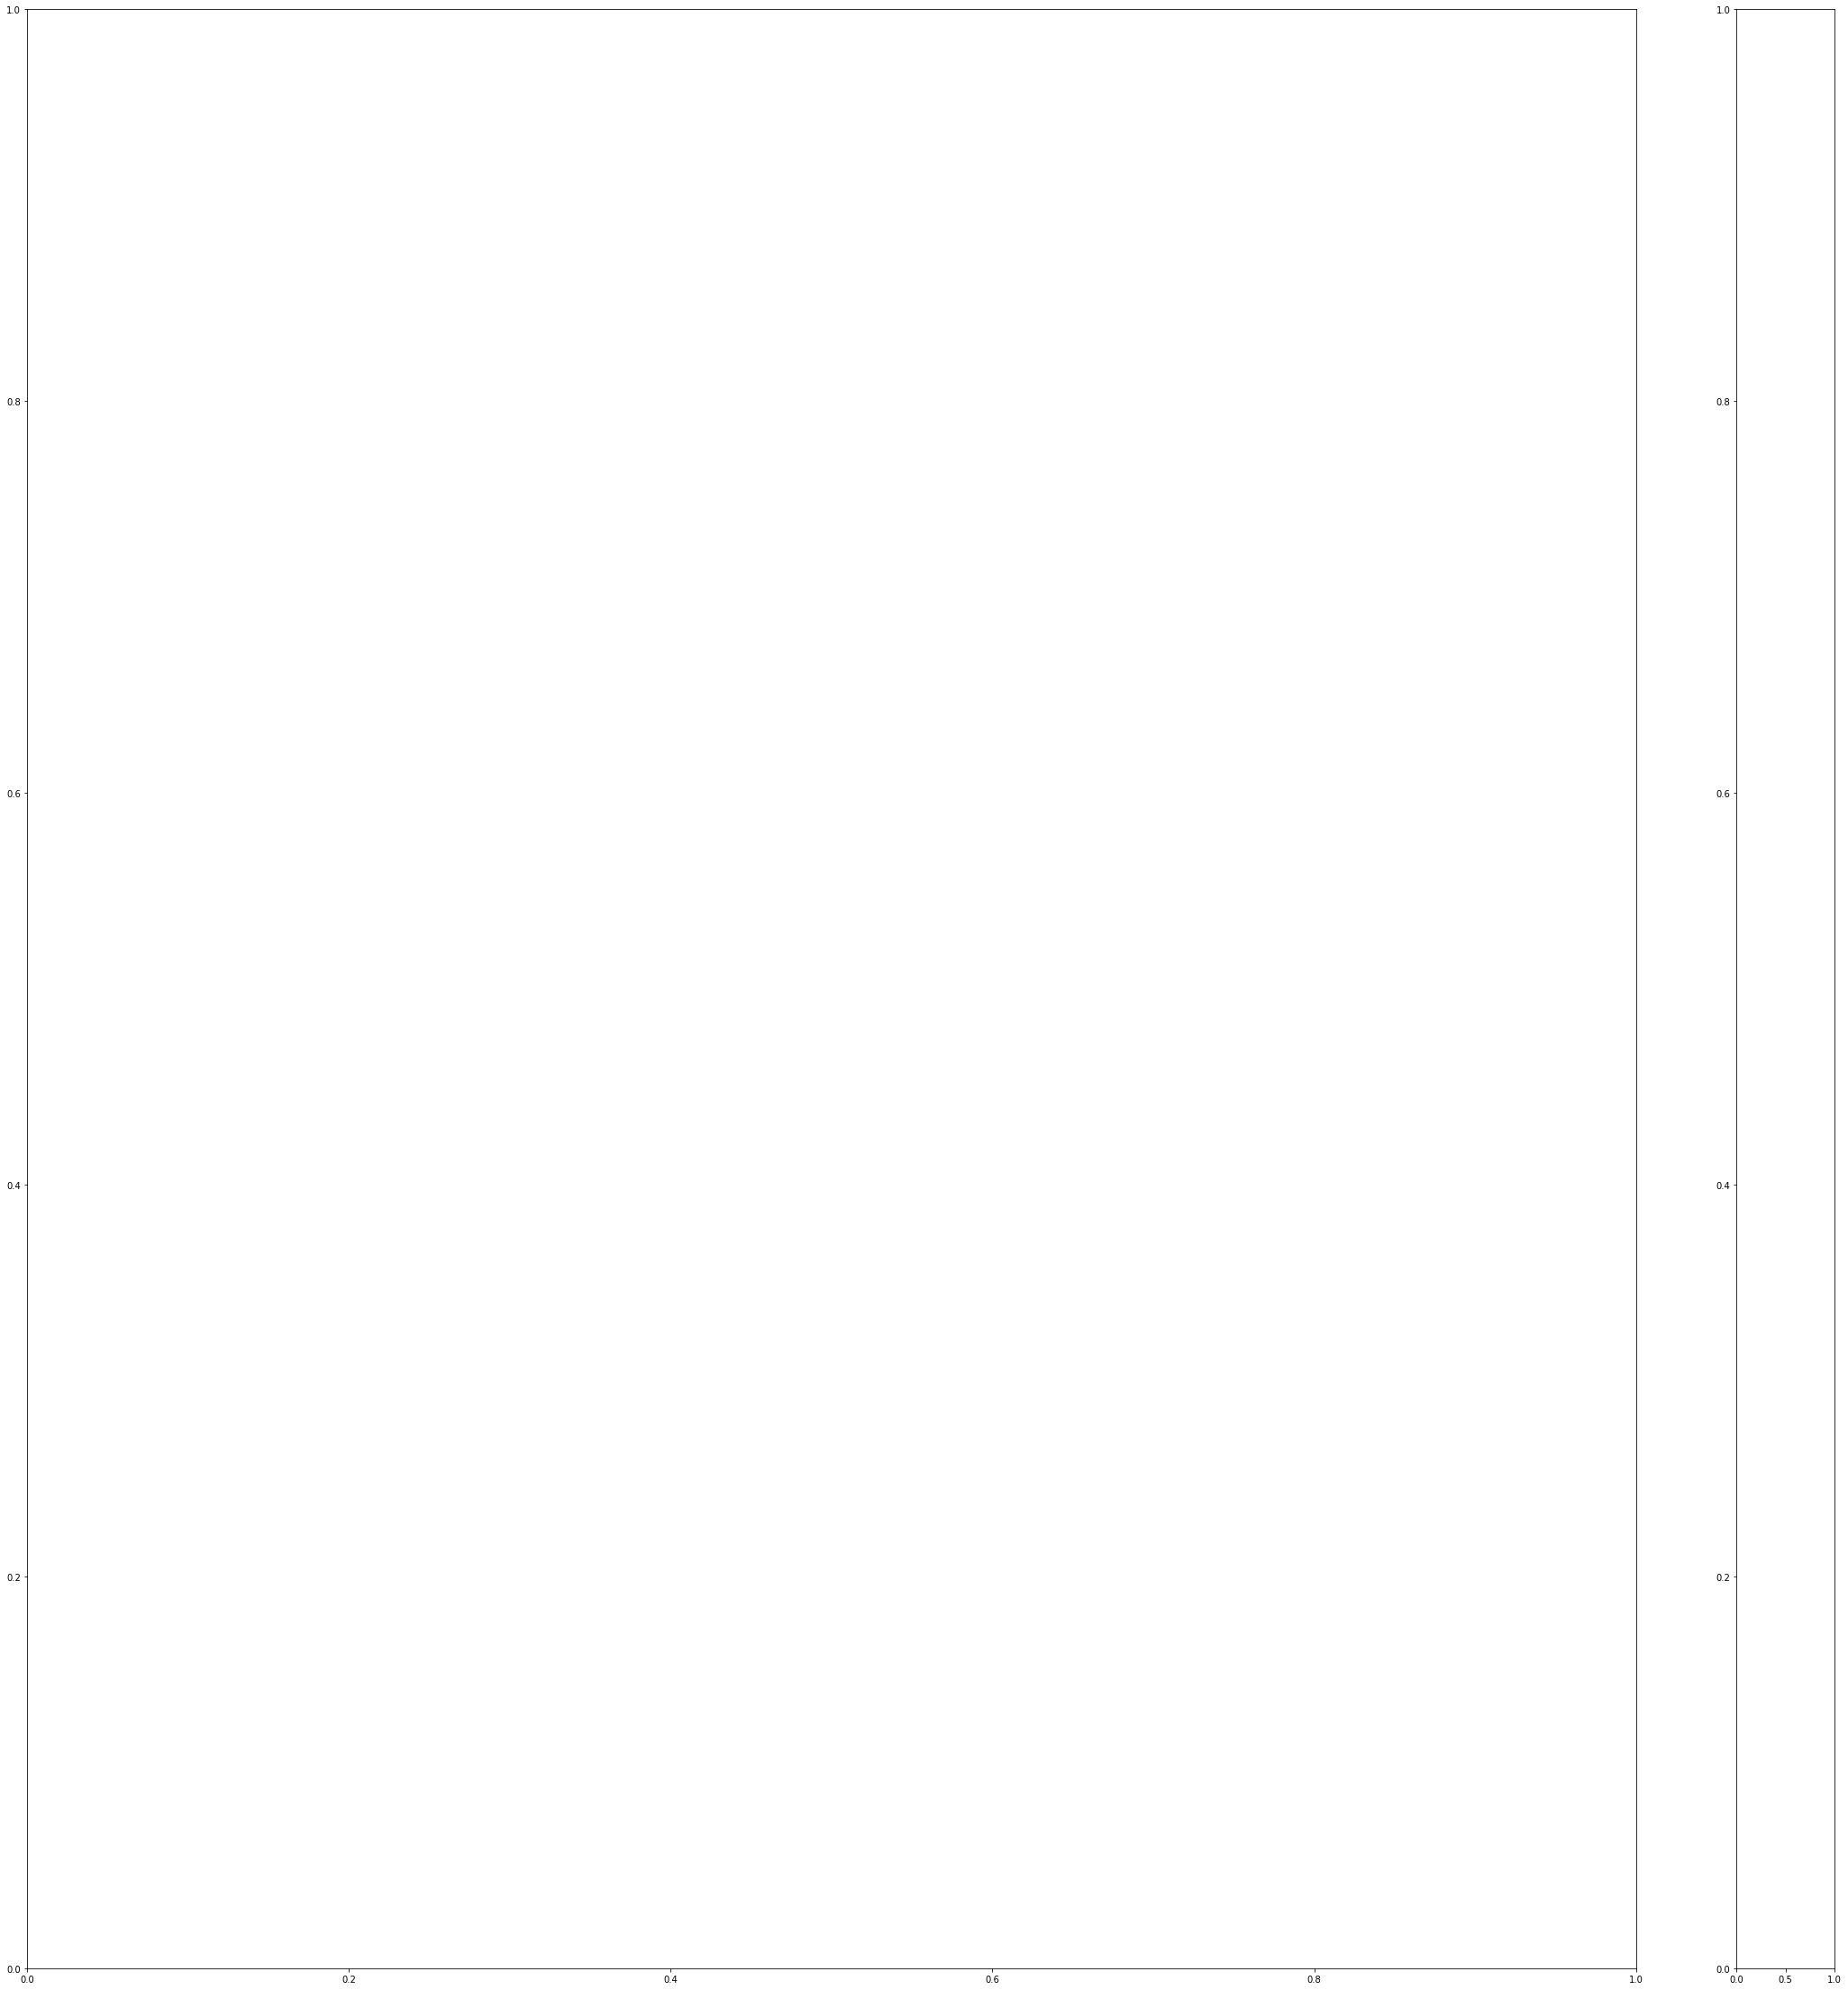

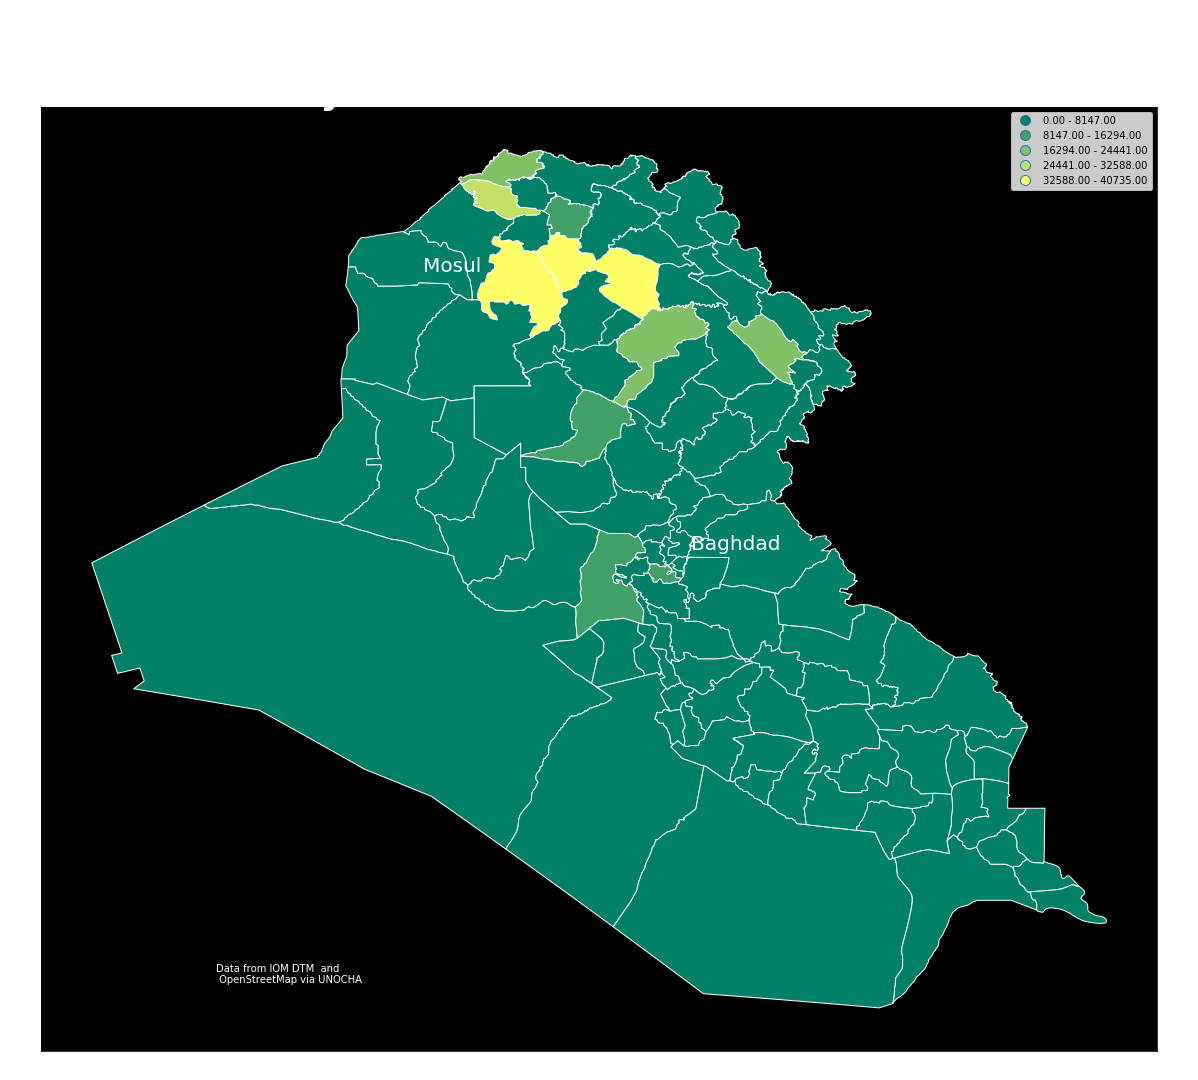

In [111]:

plt.rcParams["figure.figsize"] = (20,20)
#iq = iraq.plot(color='black', edgecolor='white')
iq_dist2.plot(column = 'counts', cmap = "summer", legend = True, 
              scheme='equal_interval', edgecolor = "white")

plt.title("Location of Iraqi IDP Households in March 2018\n By Administrative District", fontsize = 50, color = "white")
plt.tick_params(labelsize = 15 , colors = "white")

ax = plt.gca()

ax.set_facecolor('black')
plt.text(42, 36.2, s= "Mosul",  color = 'white', fontsize = 20)
plt.text(44.6, 33.5, s= "Baghdad",  color = 'white', fontsize = 20)
plt.text(40, 29.3, s = "Data from IOM DTM  and\n OpenStreetMap via UNOCHA", color = 'white', fontsize = 10)
plt.show();

# Simulated

In [89]:
# now do my own
walks = []
for i in result_list:
    val = i["OBJECTID"].values
    if len(val) == 1:
        walks.append(make_walk(adj_mat, val[0] - 1 , 4, places)) # adjust for 0-index

NameError: name 'result_list' is not defined

In [88]:
iq_dist3 = iq_dist.copy()
iq_dist3['counts'] = 0
for trip in walks:
    dest = trip[-1][1]
    iq_dist3.loc[dest, 'counts'] += 1
    


NameError: name 'walks' is not defined

In [87]:
iq_dist3.plot(column = 'counts', cmap = 'autumn');

NameError: name 'iq_dist3' is not defined

# Next steps: make the polygons more granular and tie them to the road networks. 

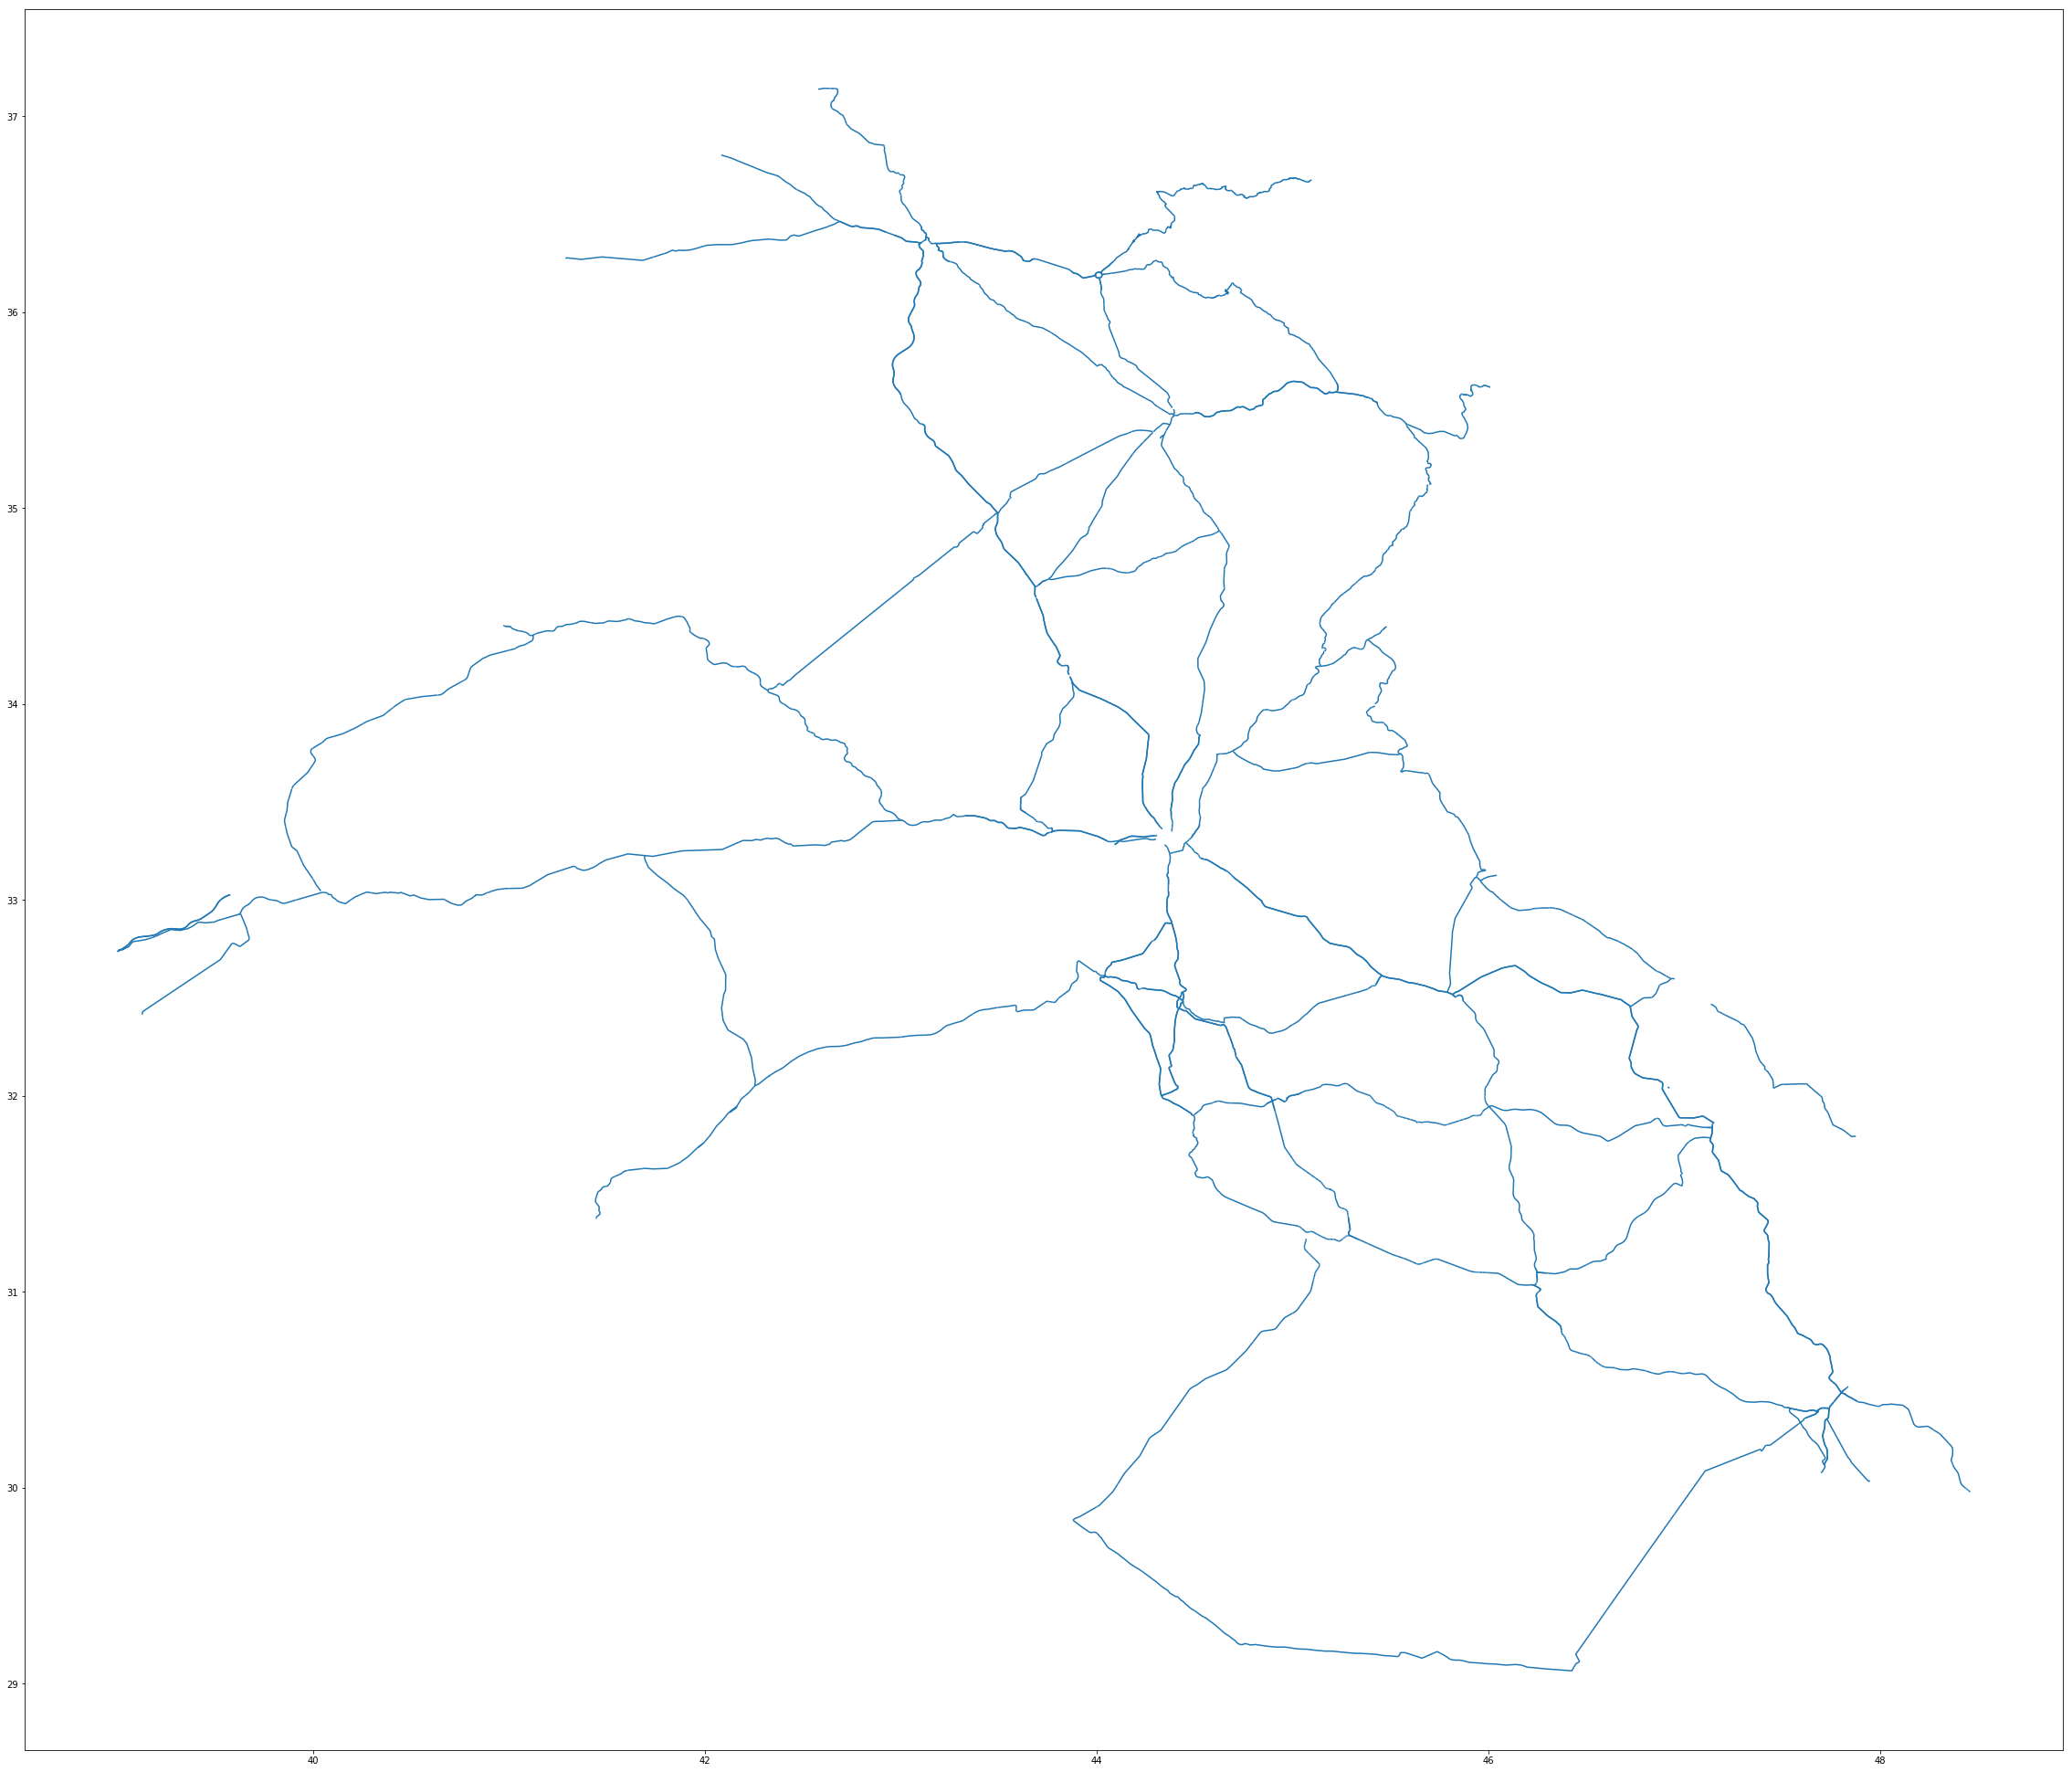

In [99]:
routes = gpd.read_file("data/primary_routes/primary_routes.shp") # from ocha https://data.humdata.org/dataset/iraq-roads
routes.plot()

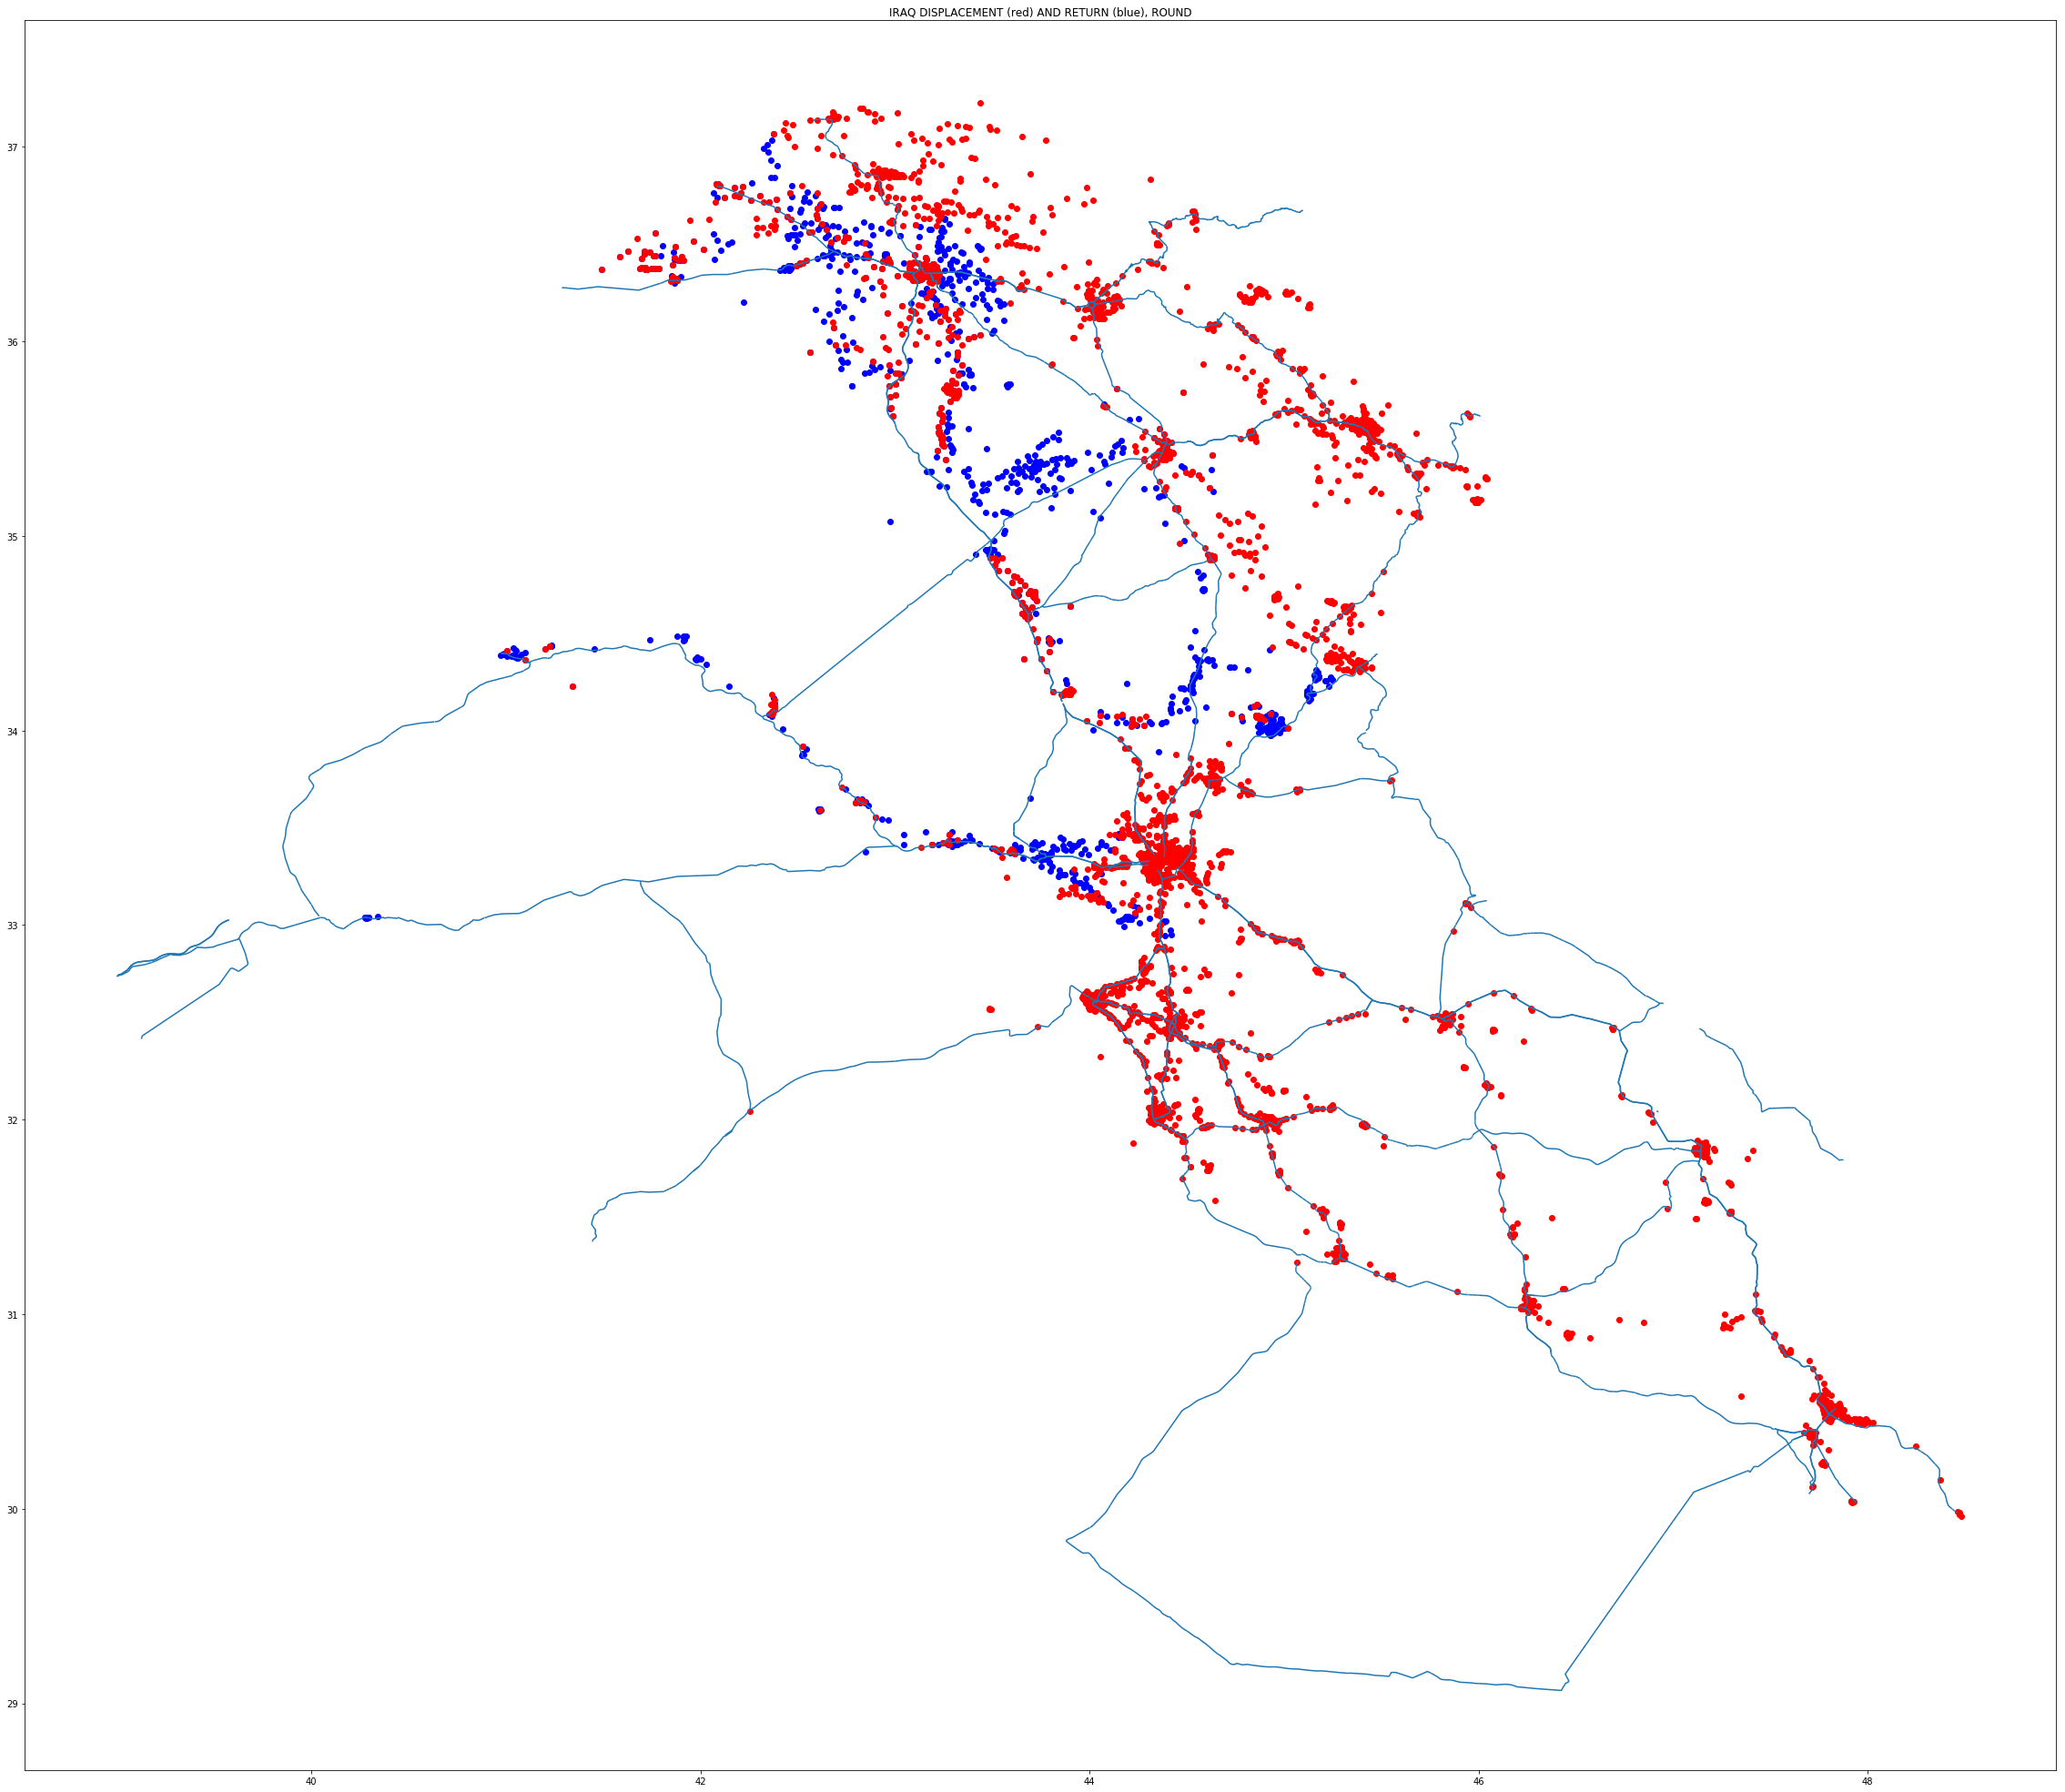

In [8]:


d = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()


dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d.itertuples() ] 
dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r.itertuples() ]
dfd['counts'] = d['Families']
dfr['counts'] = r['Families']
dfr = dfr.set_geometry('points')
dfr.crs = routes.crs
dfd = dfd.set_geometry('points')
dfd.crs = routes.crs

plt.rcParams["figure.figsize"] = (40,40)
iq = routes.plot()
dfr.plot(ax=iq, color='blue')
dfd.plot(ax=iq, color='red')
plt.title("IRAQ DISPLACEMENT (red) AND RETURN (blue), ROUND")
plt.show();

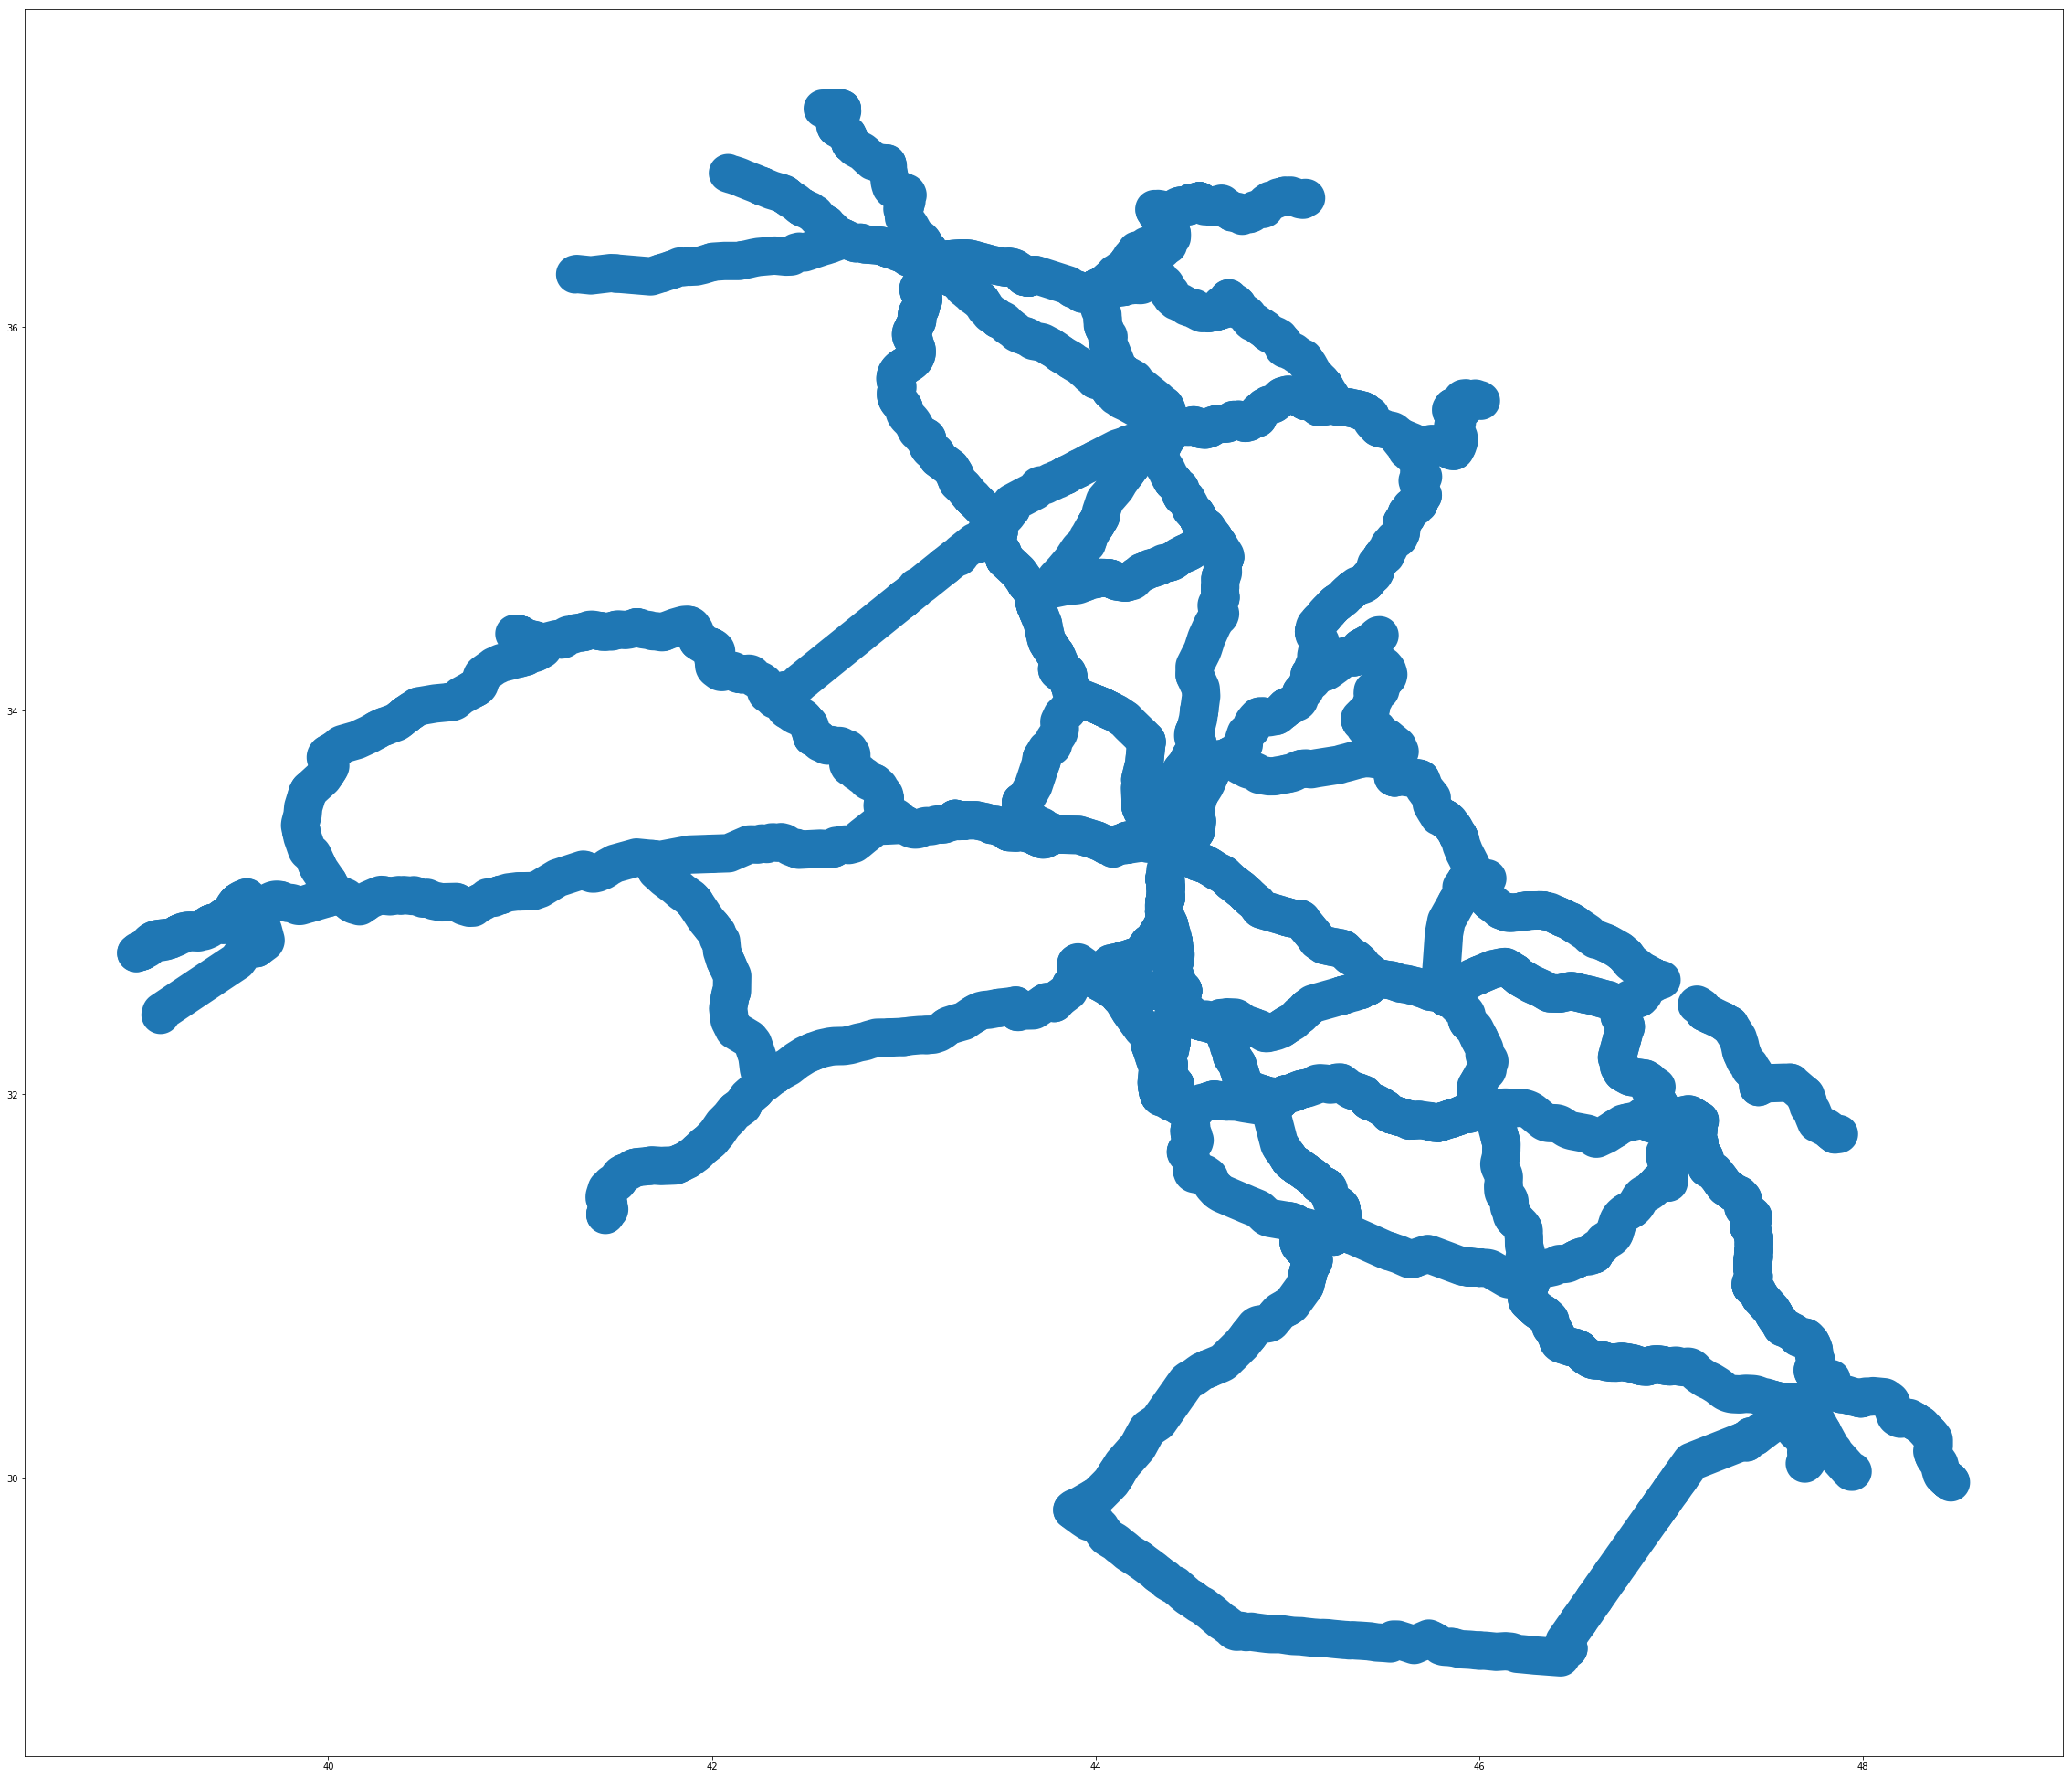

In [107]:
fat_routes = routes.buffer(.1)  # https://data.humdata.org/dataset/iraq-roads
fat_routes.plot()

# With roads

In [143]:
fat_geo = gpd.GeoDataFrame()
fat_geo['geometry'] = fat_routes
fat_geo['id'] = np.arange(0, len(fat_routes))

In [146]:
def get_adjacencies(district, polys):
    adj_list = polys['geometry'].intersects(district)
    bool_transform = lambda x: 1 if x == True else 0
    return [bool_transform(i) for i in adj_list]

def make_adj_mat(polys, get_adjacencies):
    adj_results = []
    num_rows = 0

    for i in polys['geometry']:
        adj_results.append(get_adjacencies(i, polys))
        num_rows += 1

    return np.identity(num_rows) + np.matrix(adj_results) # because all polgyons are self-adjacent



adj_mat = make_adj_mat(fat_geo, get_adjacencies)

In [151]:
result_list = []
for i in acled_geo.itertuples():
    check = fat_geo['geometry'].contains(i.geometry)
    result_list.append(fat_geo.loc[check])

In [174]:
walks = []
for i in result_list:
    val = i["id"].values
    walks.append(make_walk(adj_mat, val, 1, places))

In [ ]:
# this gets super messy because of multiple areas being considered as "in"

In [176]:
iq_dist4 = fat_geo.copy()
iq_dist4['counts'] = 0
for trip in walks:
    dest = trip[-1][1]
    iq_dist4.loc[dest, 'counts'] += 1


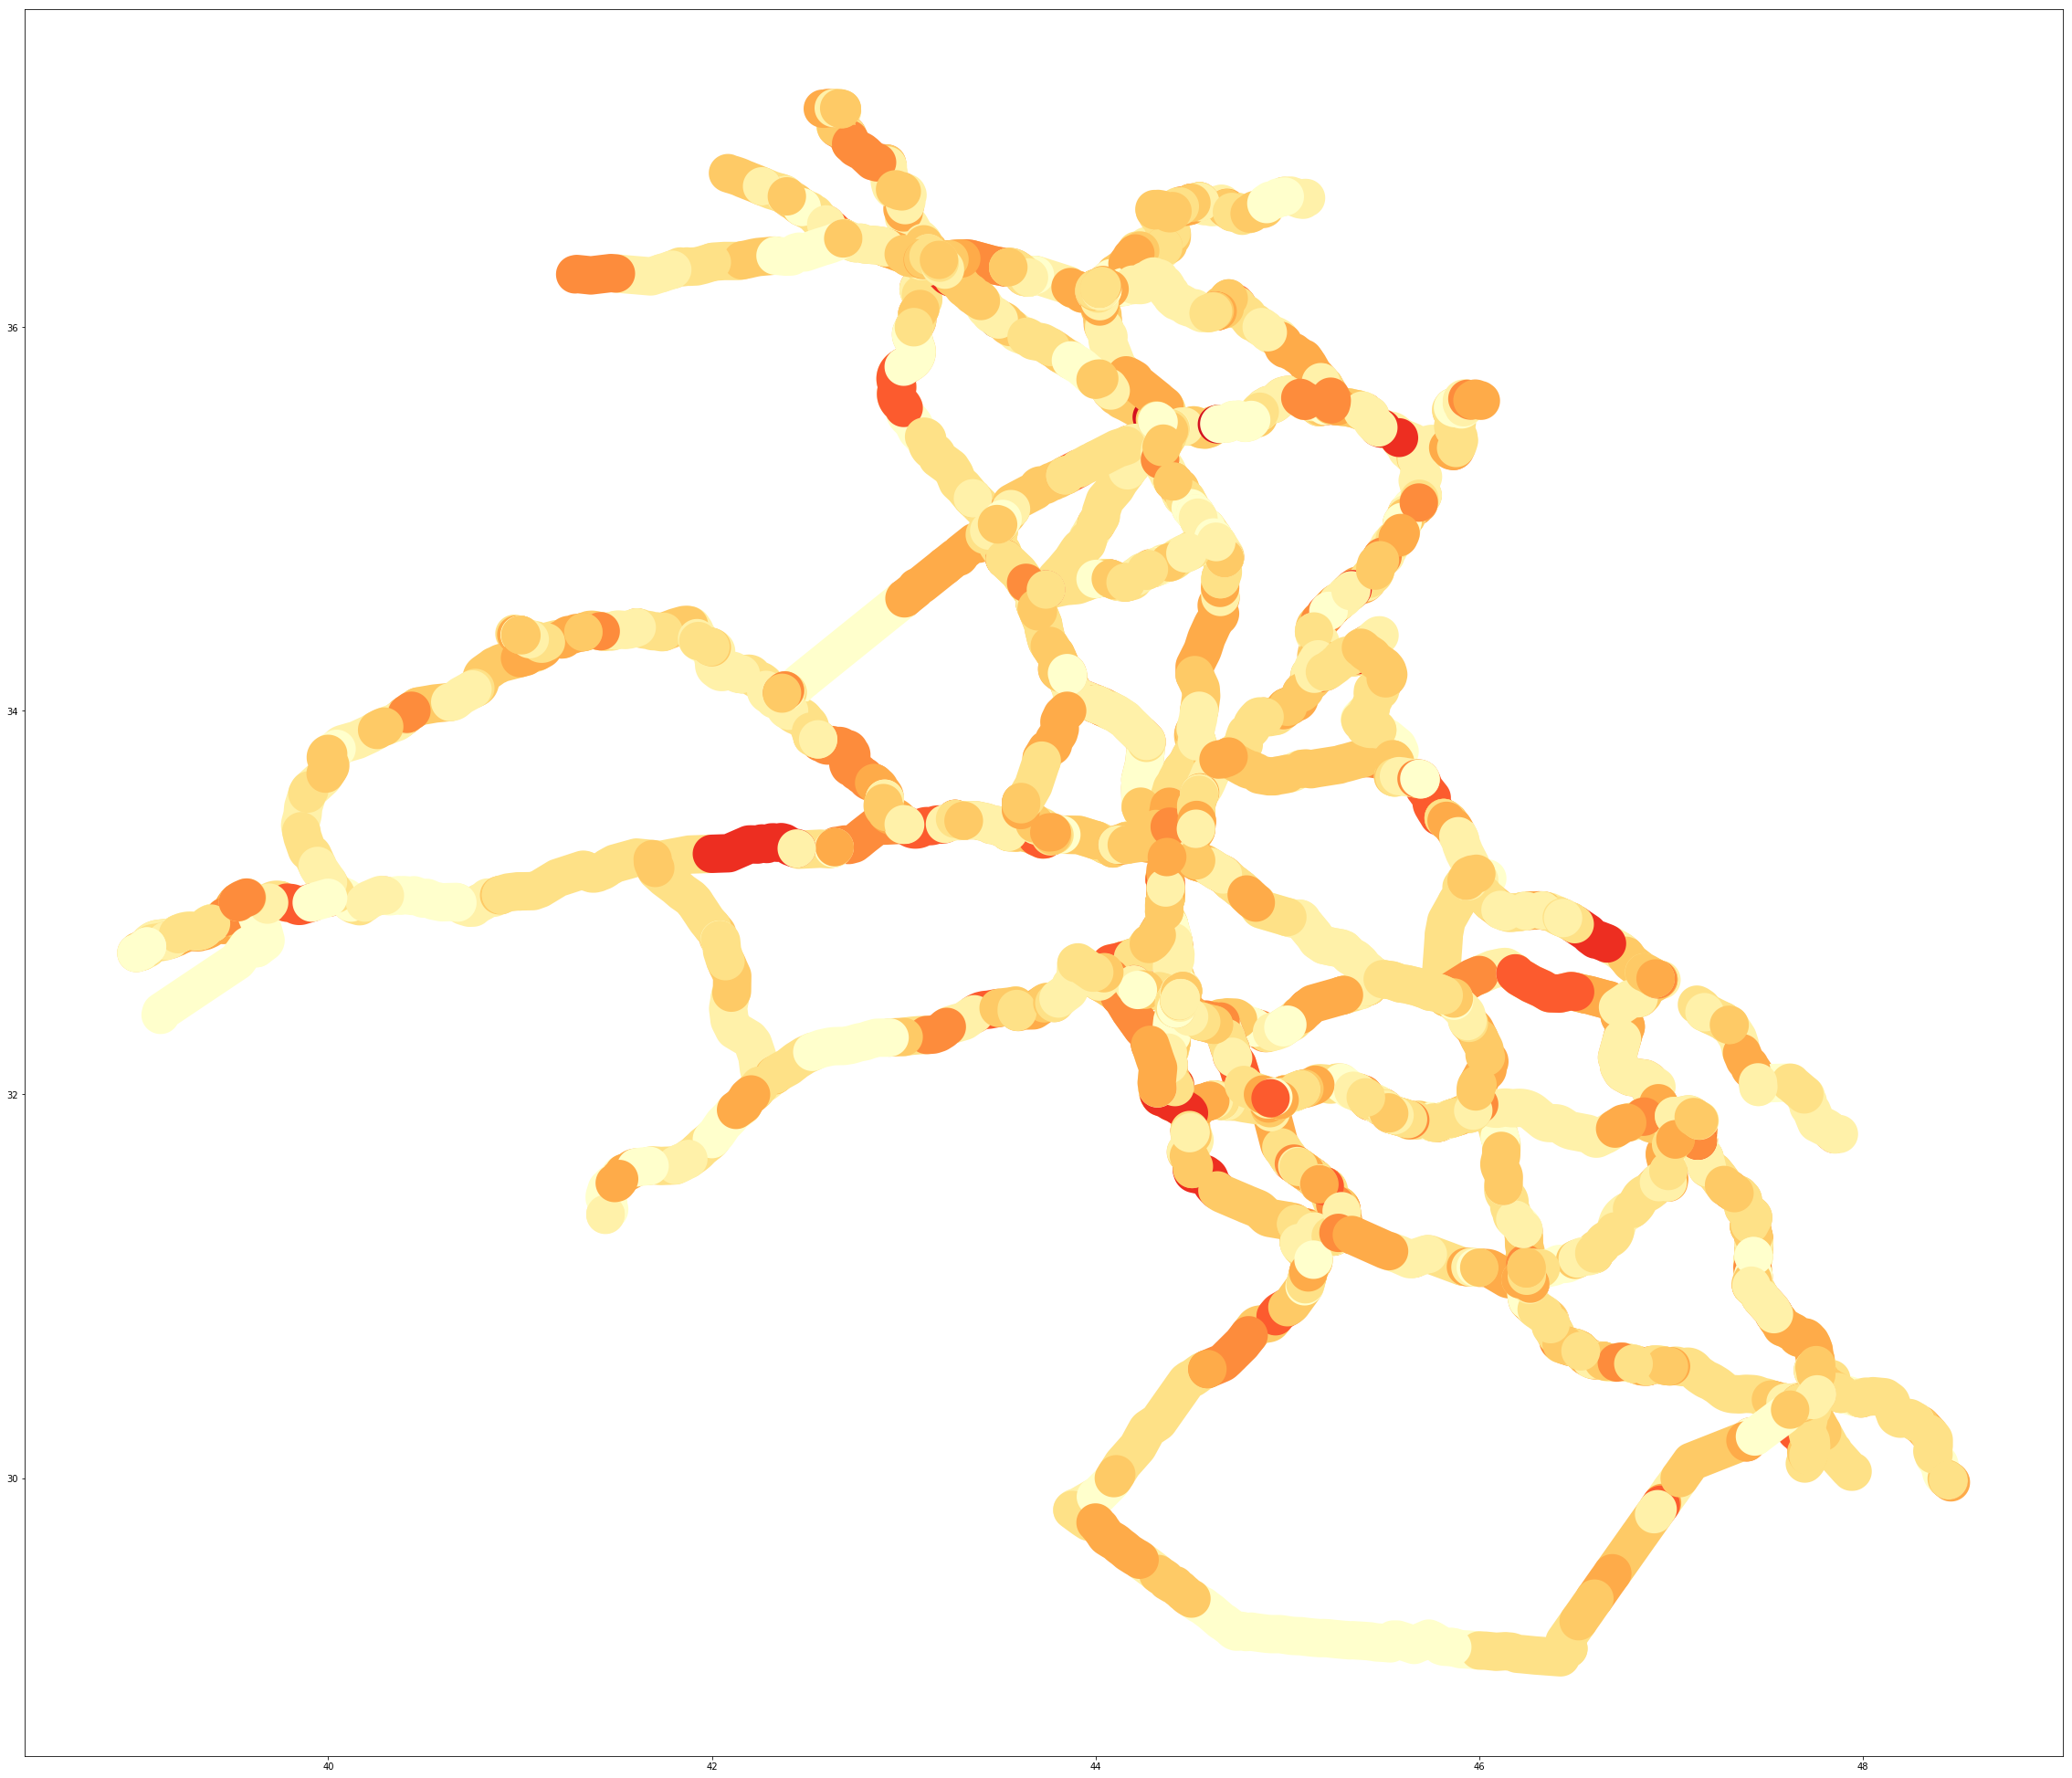

In [177]:
iq_dist4.plot(column = 'counts', cmap = 'YlOrRd');

# Settled locations

In [3]:
# https://data.humdata.org/dataset/settlements-villages-towns-cities

settled = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
settled

PCode                              PNameEn        PNameAr  \
0      IQ-P00001                    Al 'Bor (Shishan)      حي العبور   
1      IQ-P00002                           Al Ma'adid       المعاضيد   
2      IQ-P00003                           Al Tadamon     حي التضامن   
3      IQ-P00004                    Al-A'Wany Village   قرية العواني   
4      IQ-P00005                      Al-Hasa Complex                  
5      IQ-P00006                     Al-Hay al-Askari                  
6      IQ-P00007                            Al-Qala'a                  
7      IQ-P00008                   Al-Zawiyah Village                  
8      IQ-P00009                         Hay al Nasir       حي النصر   
9      IQ-P00010                    Hay al Qadissiyah    حي القادسية   
10     IQ-P00011                         Hay al Salam      حي السلام   
11     IQ-P00012                        Hay al Tammem     حي التأميم   
12     IQ-P00013                        Hay al Zera'I     حي الزراعي   
13     IQ-P00014                      Hay al-Duwaia'a                  
14     IQ-P00015                        Hay al-Shubaa                  
15     IQ-P00016                       Rawa al-Jadida                  
16     IQ-P00017                       Rawa al-Qadima                  
17     IQ-P00018                              Rayhana  مجمع الريحانه   
18     IQ-P00019                              Yarmouk     حي اليرموك   
19     IQ-P00020                             7 Nissan                  
20     IQ-P00021                          Abu Sideera                  
21     IQ-P00022                         Ad Dulaimiya                  
22     IQ-P00023                      Ahmad al Husayn                  
23     IQ-P00024                         Al 'Amiriyah       العامرية   
24     IQ-P00025                         Al A'Rimiyah       العريمية   
25     IQ-P00026                            Al Askari                  
26     IQ-P00027                            Al Bakara                  
27     IQ-P00028  Al Batra Wal Sakhriyah (Al Heremat)                  
28     IQ-P00029                   Al Dawayah Village        الدواية   
29     IQ-P00030                          Al Fallujah                  
...          ...                                  ...            ...   
23961  IQ-P23914                        Shekh Hawwazi                  
23962  IQ-P23915                               Shoraw                  
23963  IQ-P23916                              Shuwara                  
23964  IQ-P23917                         Sulaiman Bag                  
23965  IQ-P23918                          Takhta Mina                  
23966  IQ-P23919                       Tal Sharif Big                  
23967  IQ-P23920                    Tal Sharif Little                  
23968  IQ-P23921                                Talaw                  
23969  IQ-P23922                  Tappa Charmuk Lower                  
23970  IQ-P23923                  Tappa Charmuk Upper                  
23971  IQ-P23924                              Taza De                  
23972  IQ-P23925                         Tepe Charmuk                  
23973  IQ-P23926                             Thuailib                  
23974  IQ-P23927                                 Tooz                  
23975  IQ-P23928                   Tooz - Hay al Teen                  
23976  IQ-P23929                        Touz Hourmato                  
23977  IQ-P23930                            Uch Tappa                  
23978  IQ-P23931                           Um al-Gita                  
23979  IQ-P23932                         Waran Middle                  
23980  IQ-P23933                         Warani Lower                  
23981  IQ-P23934                         Warani Upper                  
23982  IQ-P23935                                 Yafa                  
23983  IQ-P23936                              Yangija                  
23984  IQ-P23937                           Yanija B

In [4]:
settled.head()

PCode            PNameEn       PNameAr  Longitude   Latitude  \
0  IQ-P00001  Al 'Bor (Shishan)     حي العبور  41.977818  34.369352   
1  IQ-P00002         Al Ma'adid      المعاضيد  42.145227  34.226544   
2  IQ-P00003         Al Tadamon    حي التضامن  41.972490  34.367327   
3  IQ-P00004  Al-A'Wany Village  قرية العواني  41.987483  34.373356   
4  IQ-P00005    Al-Hasa Complex                41.789831  34.493056   

   PCodeAlt1          PNameAlt1  A1Code A1NameEn   A2Code A2NameEn  \
0   110013.0  Al 'bor (Shishan)  IQ-G01    Anbar  IQ-D001      Ana   
1   110011.0         Al ma'adid  IQ-G01    Anbar  IQ-D001      Ana   
2   110017.0         Al Tadamon  IQ-G01    Anbar  IQ-D001      Ana   
3   110318.0  Al-A'wany Village  IQ-G01    Anbar  IQ-D001      Ana   
4   110021.0    Al-Hasa Complex  IQ-G01    Anbar  IQ-D001      Ana   

                      geometry  
0  POINT (41.977818 34.369352)  
1  POINT (42.145227 34.226544)  
2   POINT (41.97249 34.367327)  
3  POINT (41.987483 34.373356)  
4  POINT (41.789831 34.493056)

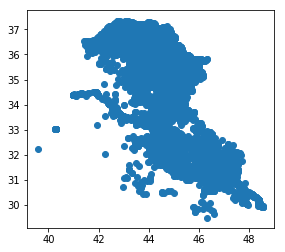

In [5]:
settled.plot()

# Roads

In [ ]:
all_rds = gpd.read_file("data/hotosm_irq_roads_lines_shp/hotosm_irq_roads_lines.shp")

In [26]:
all_rds.head()

osm_id            name    highway surface smoothness width lanes oneway  \
0  4061247                   motorway                                   yes   
1  4061651                      trunk                                   yes   
2  4061657                  secondary                                         
3  4061700  Haythaf Square  secondary                                   yes   
4  4061703                  secondary                                         

  bridge layer z_index                                           geometry  
0                    9  LINESTRING (44.3087191 33.2924177, 44.3082065 ...  
1                    8  LINESTRING (44.3863725 33.3984428, 44.3864499 ...  
2                    6  LINESTRING (44.3870643 33.3372023, 44.3869371 ...  
3                    6  LINESTRING (44.3924783 33.330185, 44.3924024 3...  
4                    6  LINESTRING (44.3761913 33.3344338, 44.3761065 ...

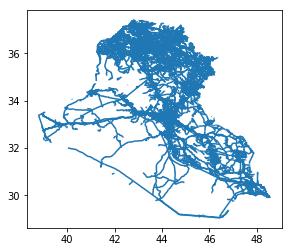

In [11]:
all_rds.plot()

In [144]:
test = all_rds.loc[:10,:]


def make_adj_mat(polys, get_adjacencies):
    adj_results = []
    num_rows = 0

    for i in polys['geometry']:
        adj_results.append(get_adjacencies(polys, i))
        num_rows += 1

    return np.matrix(adj_results) # because all lines are self-adjacent


def get_adjacencies(polys, district):
    adj_list = polys['geometry'].intersects(district)
    bool_transform = lambda x: 1 if x == True else 0
    return [bool_transform(i) for i in adj_list]



make_adj_mat(test, get_adjacencies)


matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [145]:
roads_adj = make_adj_mat(all_rds.loc[:200,:], get_adjacencies)

In [146]:
roads_adj

matrix([[1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 1]])

In [104]:
walks = []
for i in result_list:
    val = i["id"].values
    walks.append(make_walk(adj_mat, val, 1, places))

NameError: name 'result_list' is not defined

In [147]:
def make_walk(adj_mat, start, num_steps):
    walk_record = random_walker(adj_mat, start, [], num_steps)
    return walk_record

In [148]:
make_walk(roads_adj, 2, 3)

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[(2, 2), (2, 2), (2, 2)]

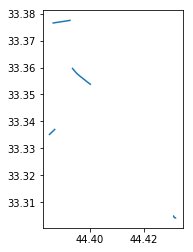

In [149]:
new_rds = all_rds.loc[[2,51, 168, 110], :]
new_rds.plot()

In [150]:
routes = gpd.read_file("data/primary_routes/primary_routes.shp") # from ocha https://data.humdata.org/dataset/iraq-roads
x = make_adj_mat(routes.loc[:1000, :], get_adjacencies)

unpack = lambda x:  [j for j in i for i in x]

walk = make_walk(x, 150, 10)
to_plot = list(set(unpack(walk)))

print(list(set(to_plot)))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

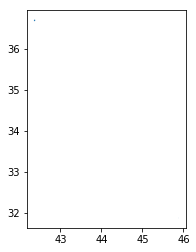

In [151]:
routes.loc[to_plot,:].plot()

In [157]:
G = nx.read_shp("data/primary_routes/primary_routes.shp", simplify = True)

TypeError: iter() returned non-iterator of type 'Layer'

# Trying with pysal

In [159]:
import pysal as ps
ntw = ps.Network("data/primary_routes/primary_routes.shp") # takes some time

In [168]:
ntw.extractgraph()

In [173]:
dir(ntw)

['NetworkF',
 'NetworkG',
 'NetworkK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_extractnetwork',
 '_newpoint_coords',
 '_round_sig',
 '_snap_to_edge',
 '_yieldneighbor',
 'adjacencylist',
 'allneighbordistances',
 'compute_distance_to_nodes',
 'contiguityweights',
 'count_per_edge',
 'distancebandweights',
 'edge_lengths',
 'edge_to_graph',
 'edges',
 'enum_links_node',
 'extractgraph',
 'graph_lengths',
 'graph_to_edges',
 'graphedges',
 'in_shp',
 'loadnetwork',
 'nearestneighbordistances',
 'node_coords',
 'node_distance_matrix',
 'node_list',
 'node_sig',
 'nodes',
 'pointpatterns',
 'savenetwork',
 'segment_edges',
 'simulate_observations',
 'snapobservat

In [198]:
f = ntw.simulate_observations(10)
ntw.snapobservations(f, 'test')
#ntw.allneighbordistances(f)

TypeError: expected str, bytes or os.PathLike object, not SimulatedPointPattern

In [200]:
ntw.graphedges # This gets me edges, etc. This may be way to contruct my matrix?

[(5, 61509),
 (5, 62978),
 (5, 62978),
 (58, 3689),
 (58, 20323),
 (58, 54849),
 (58, 72415),
 (103, 28600),
 (103, 35570),
 (103, 38969),
 (194, 56012),
 (195, 10211),
 (954, 25146),
 (955, 73859),
 (961, 972),
 (973, 36166),
 (1000, 1001),
 (1001, 1003),
 (1001, 18189),
 (1003, 24772),
 (1003, 62799),
 (1171, 20071),
 (1171, 30903),
 (1171, 45698),
 (1306, 50556),
 (1405, 6602),
 (1405, 7947),
 (1405, 37243),
 (1443, 16071),
 (1443, 35234),
 (1443, 38577),
 (1541, 43044),
 (1542, 7991),
 (1651, 27912),
 (1651, 27912),
 (1651, 58253),
 (1736, 10398),
 (1736, 11552),
 (1736, 13859),
 (1772, 35440),
 (1775, 9602),
 (1775, 9602),
 (1775, 26601),
 (1776, 4765),
 (1793, 4264),
 (1793, 10830),
 (1793, 51894),
 (1798, 1813),
 (1813, 16754),
 (1813, 16754),
 (1875, 1876),
 (1875, 54507),
 (1875, 55505),
 (1875, 71793),
 (1876, 48736),
 (1876, 55505),
 (1876, 74922),
 (2046, 28589),
 (2067, 26854),
 (2417, 39899),
 (2449, 33806),
 (2449, 35476),
 (2449, 70203),
 (2519, 5671),
 (2519, 5671),
 (